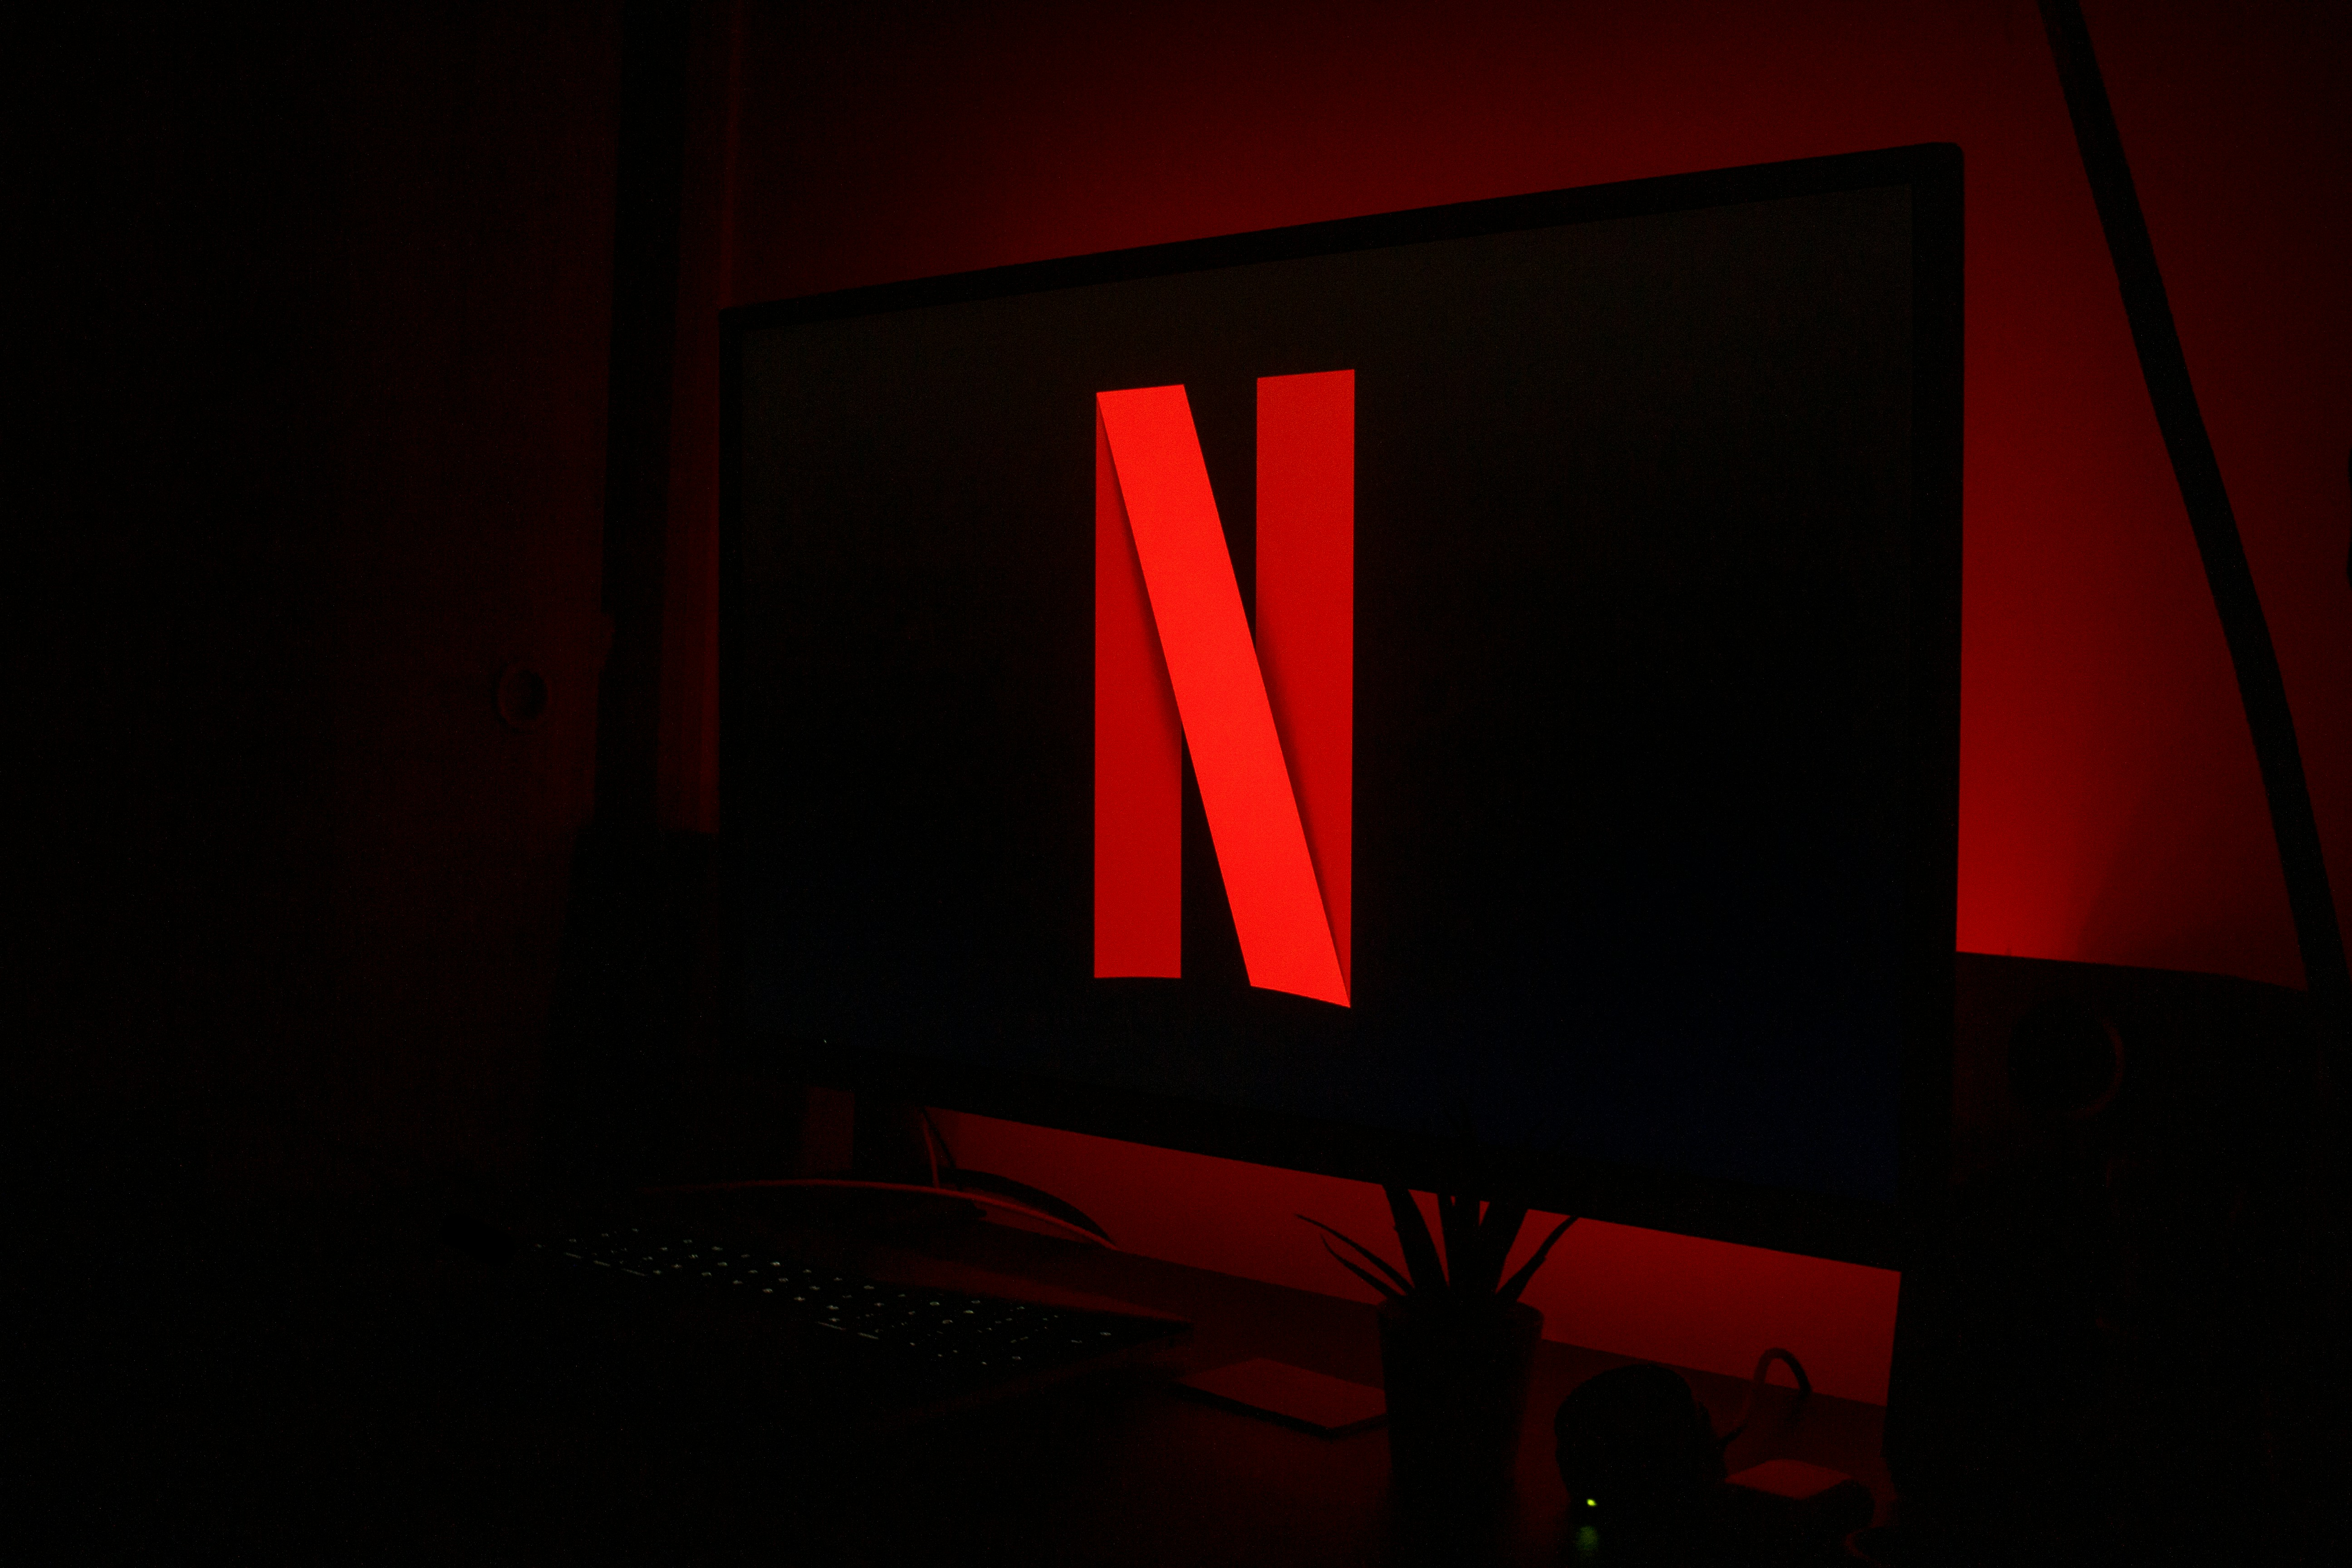

# About NETFLIX

**Netflix** is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

# Business Problem

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

In [1]:
#importing libraries for our purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/netflix_csv')
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

# Data Inspection

In [4]:
df.shape

(8807, 12)

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
# checking duplicate values are present
df.duplicated().sum()

0

No Duplicated entries are present in this dataframe

In [8]:
# checking null values
for i in df.columns:
  print(i, ':', df[i].isna().sum())

show_id : 0
type : 0
title : 0
director : 2634
cast : 825
country : 831
date_added : 10
release_year : 0
rating : 4
duration : 3
listed_in : 0
description : 0


# Data Cleaning and Featuring

In [9]:
# AS 74 min, 84min, and 66 min are duration not rating, we will replace in dataframe
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

# Splitting Director Column With Multiple Names Into Single Name

In [10]:
directors= df['director'].apply(lambda x: str(x).split(', ')).tolist()

In [11]:
data= pd.DataFrame(directors, index= df['title'])
data.head()

0     1     2     3     4     5     6   \
title                                                                        
Dick Johnson Is Dead   Kirsten Johnson  None  None  None  None  None  None   
Blood & Water                      nan  None  None  None  None  None  None   
Ganglands              Julien Leclercq  None  None  None  None  None  None   
Jailbirds New Orleans              nan  None  None  None  None  None  None   
Kota Factory                       nan  None  None  None  None  None  None   

                         7     8     9     10    11    12  
title                                                      
Dick Johnson Is Dead   None  None  None  None  None  None  
Blood & Water          None  None  None  None  None  None  
Ganglands              None  None  None  None  None  None  
Jailbirds New Orleans  None  None  None  None  None  None  
Kota Factory           None  None  None  None  None  None

In [12]:
# unnested director column so that all directors gets seprate line for each movie
dir_data= data.stack()
df_new1=pd.DataFrame(dir_data.reset_index())
df_new1.head()

title  level_1                0
0   Dick Johnson Is Dead        0  Kirsten Johnson
1          Blood & Water        0              nan
2              Ganglands        0  Julien Leclercq
3  Jailbirds New Orleans        0              nan
4           Kota Factory        0              nan

In [13]:
# dropping level_1 column and renaming director column
df_new1.drop(columns= 'level_1', inplace= True)
df_new1.rename(columns= {0: 'directors'}, inplace= True)

# Splitting Cast Column With Multiple Names Into Single Name

In [14]:
# unnested cast column so that all actors gets seprate line for each movie
cast= df['cast'].apply(lambda x: str(x).split(', ')).tolist()
data= pd.DataFrame(cast, index= df['title'])
cast_data= data.stack()
df_new2=pd.DataFrame(cast_data.reset_index())
df_new2.head()

title  level_1               0
0  Dick Johnson Is Dead        0             nan
1         Blood & Water        0      Ama Qamata
2         Blood & Water        1     Khosi Ngema
3         Blood & Water        2   Gail Mabalane
4         Blood & Water        3  Thabang Molaba

In [15]:
# dropping level_1 column and renaming director column
df_new2.drop(columns= 'level_1', inplace= True)
df_new2.rename(columns= {0: 'actor'}, inplace= True)

# Splitting Listed Column With Multiple Names Into Single Name

In [16]:
# unnested listed column so that all genres gets seprate line for each movie
genre= df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
genre_data= pd.DataFrame(genre, index= df['title'])
df_new3= genre_data.stack()
df_new3= pd.DataFrame(df_new3.reset_index())
df_new3.head()

title  level_1                       0
0  Dick Johnson Is Dead        0           Documentaries
1         Blood & Water        0  International TV Shows
2         Blood & Water        1               TV Dramas
3         Blood & Water        2            TV Mysteries
4             Ganglands        0          Crime TV Shows

In [17]:
# dropping level_1 column and renaming director column
df_new3.drop(columns= 'level_1', inplace= True)
df_new3.rename(columns= {0: 'genre'}, inplace= True)

# Splitting Country Column With Multiple Names Into Single Name

In [18]:
# unnested country column so that all country gets seprate line for each movie
country= df['country'].apply(lambda x: str(x).split(', ')).tolist()
country= pd.DataFrame(country, index= df['title'])
df_new4= country.stack()
df_new4= pd.DataFrame(df_new4.reset_index())
df_new4.head()

title  level_1              0
0   Dick Johnson Is Dead        0  United States
1          Blood & Water        0   South Africa
2              Ganglands        0            nan
3  Jailbirds New Orleans        0            nan
4           Kota Factory        0          India

In [19]:
# dropping level_1 column and renaming director column
df_new4.drop(columns= 'level_1', inplace= True)
df_new4.rename(columns= {0: 'country'}, inplace= True)

In [20]:
# merged unnested columns actor and director
data5= pd.merge(df_new1, df_new2, how= 'inner', on = 'title')

# merged unnested columns genre and country
data6= pd.merge(df_new3, df_new4, how= 'inner', on = 'title')

# Merged all the unnested columns

In [21]:
merged_data= pd.merge(data5, data6, how= 'inner', on= 'title')
merged_data.head()

title        directors        actor                   genre  \
0  Dick Johnson Is Dead  Kirsten Johnson          nan           Documentaries   
1         Blood & Water              nan   Ama Qamata  International TV Shows   
2         Blood & Water              nan   Ama Qamata               TV Dramas   
3         Blood & Water              nan   Ama Qamata            TV Mysteries   
4         Blood & Water              nan  Khosi Ngema  International TV Shows   

         country  
0  United States  
1   South Africa  
2   South Africa  
3   South Africa  
4   South Africa

In [22]:
merged_data['actor'].replace('nan', 'Unknown', inplace= True)
merged_data['directors'].replace('nan', 'Unknown', inplace= True)
merged_data['country'].replace('nan', np.nan, inplace= True)

In [23]:
# merged unnested new dataset with original dataset
data= merged_data.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']],on=['title'],how='left')
data.head()

title        directors        actor                   genre  \
0  Dick Johnson Is Dead  Kirsten Johnson      Unknown           Documentaries   
1         Blood & Water          Unknown   Ama Qamata  International TV Shows   
2         Blood & Water          Unknown   Ama Qamata               TV Dramas   
3         Blood & Water          Unknown   Ama Qamata            TV Mysteries   
4         Blood & Water          Unknown  Khosi Ngema  International TV Shows   

         country show_id     type          date_added  release_year rating  \
0  United States      s1    Movie  September 25, 2021          2020  PG-13   
1   South Africa      s2  TV Show  September 24, 2021          2021  TV-MA   
2   South Africa      s2  TV Show  September 24, 2021          2021  TV-MA   
3   South Africa      s2  TV Show  September 24, 2021          2021  TV-MA   
4   South Africa      s2  TV Show  September 24, 2021          2021  TV-MA   

    duration  
0     90 min  
1  2 Seasons  
2  2 Seasons  
3  2 Seasons  
4  2 Seasons

# Filling Null Values

In [24]:
# checking null values
data.isna().sum()

title               0
directors           0
actor               0
genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

In [25]:
# replaced the null values with the duration present in rating column
data.loc[data['duration'].isnull(), 'duration']= data.loc[data['duration'].isnull(), 'duration'].fillna(data['rating'])
data.loc[data['rating'].str.contains('min', na= False), 'rating']= 'NR'

In [26]:
data.isna().sum()

title               0
directors           0
actor               0
genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            0
dtype: int64

In [27]:
# Filled missing values in rating column with NR
data['rating'].fillna('NR', inplace= True)

In [28]:
#date added column is imputed on the basis of release year,i.e- suppose there's a null for date_added
#when release year was 2013.So below piece of code just checks the mode of date added for release year=2013
# and imputes in place of nulls the corresponding mode

for i in data[data['date_added'].isnull()]['release_year'].unique():
    imp = data[data['release_year']==i]['date_added'].mode().values[0]
    data.loc[data['release_year']==i,'date_added'] = data.loc[data['release_year']==i,'date_added'].fillna(imp)

In [29]:
data.isnull().sum()

title               0
directors           0
actor               0
genre               0
country         11897
show_id             0
type                0
date_added          0
release_year        0
rating              0
duration            0
dtype: int64

In [30]:
data['rating'].value_counts()

rating
TV-MA       73867
TV-14       43931
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1643
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
Name: count, dtype: int64

In [31]:
#country column is imputed on the basis of director,i.e- suppose there's a null for country
#when we have a director whose other movies have a country given.So below piece of code just checks the mode of
#country for the director
# and imputes in place of nulls the corresponding mode

for i in data[data['country'].isnull()]['directors'].unique():
  if i in data[~data['country'].isnull()]['directors'].unique():
    imp=data[data['directors']==i]['country'].mode().values[0]
    data.loc[data['directors']==i,'country']=data.loc[data['directors']==i,'country'].fillna(imp)

In [32]:
#country column is imputed on the basis of actor,i.e- suppose there's a null for country
#when we have a actor whose other movies have a country given.So below piece of code just checks the mode of
#country for the actor
# and imputes in place of nulls the corresponding mode

for i in data[data['country'].isnull()]['actor'].unique():
  if i in data[~data['country'].isnull()]['actor'].unique():
    ims=data[data['actor']==i]['country'].mode().values[0]
    data.loc[data['actor']==i,'country']=data.loc[data['actor']==i,'country'].fillna(ims)

In [33]:
data['country'].fillna('Unknown Country', inplace= True)
data['country'].isna().sum()

0

So we imputed the country column on the basis of directors whose other movie titles had countries given. But there might be directors who have only one occurence in our data. In that scenario, I have used Actors as a basis. i.e- for this Actor majorly acts in movies of which country? Imputation has been done on this basis. For remaining rows, country has been filled as Unknown Country

In [34]:
# all null values are imputed
data.isna().sum()

title           0
directors       0
actor           0
genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [36]:
data.head()

title        directors        actor                   genre  \
0  Dick Johnson Is Dead  Kirsten Johnson      Unknown           Documentaries   
1         Blood & Water          Unknown   Ama Qamata  International TV Shows   
2         Blood & Water          Unknown   Ama Qamata               TV Dramas   
3         Blood & Water          Unknown   Ama Qamata            TV Mysteries   
4         Blood & Water          Unknown  Khosi Ngema  International TV Shows   

         country show_id     type          date_added  release_year rating  \
0  United States      s1    Movie  September 25, 2021          2020  PG-13   
1   South Africa      s2  TV Show  September 24, 2021          2021  TV-MA   
2   South Africa      s2  TV Show  September 24, 2021          2021  TV-MA   
3   South Africa      s2  TV Show  September 24, 2021          2021  TV-MA   
4   South Africa      s2  TV Show  September 24, 2021          2021  TV-MA   

    duration  
0     90 min  
1  2 Seasons  
2  2 Seasons  
3  2 Seasons  
4  2 Seasons

In [43]:
data['date_added']= pd.to_datetime(data['date_added'], errors= 'coerce')

In [45]:
# created year and month name column from their listed year
data['listed_year']= data['date_added'].dt.year
data['month']= data['date_added'].dt.month_name()

In [46]:
# as there is no need for date_added column, we have removed it
data.drop(columns= 'date_added', inplace= True)

In [47]:
# remove min present in duration columns of movie
data['duration'] = data['duration'].str.replace('min', '')

In [48]:
data.head()

title        directors        actor                   genre  \
0  Dick Johnson Is Dead  Kirsten Johnson      Unknown           Documentaries   
1         Blood & Water          Unknown   Ama Qamata  International TV Shows   
2         Blood & Water          Unknown   Ama Qamata               TV Dramas   
3         Blood & Water          Unknown   Ama Qamata            TV Mysteries   
4         Blood & Water          Unknown  Khosi Ngema  International TV Shows   

         country show_id     type  release_year rating   duration  \
0  United States      s1    Movie          2020  PG-13        90    
1   South Africa      s2  TV Show          2021  TV-MA  2 Seasons   
2   South Africa      s2  TV Show          2021  TV-MA  2 Seasons   
3   South Africa      s2  TV Show          2021  TV-MA  2 Seasons   
4   South Africa      s2  TV Show          2021  TV-MA  2 Seasons   

   listed_year      month  
0       2021.0  September  
1       2021.0  September  
2       2021.0  September  
3       2021.0  September  
4       2021.0  September

In [49]:
data['duration_copy']= data['duration'].copy()
data.head()

title        directors        actor                   genre  \
0  Dick Johnson Is Dead  Kirsten Johnson      Unknown           Documentaries   
1         Blood & Water          Unknown   Ama Qamata  International TV Shows   
2         Blood & Water          Unknown   Ama Qamata               TV Dramas   
3         Blood & Water          Unknown   Ama Qamata            TV Mysteries   
4         Blood & Water          Unknown  Khosi Ngema  International TV Shows   

         country show_id     type  release_year rating   duration  \
0  United States      s1    Movie          2020  PG-13        90    
1   South Africa      s2  TV Show          2021  TV-MA  2 Seasons   
2   South Africa      s2  TV Show          2021  TV-MA  2 Seasons   
3   South Africa      s2  TV Show          2021  TV-MA  2 Seasons   
4   South Africa      s2  TV Show          2021  TV-MA  2 Seasons   

   listed_year      month duration_copy  
0       2021.0  September           90   
1       2021.0  September     2 Seasons  
2       2021.0  September     2 Seasons  
3       2021.0  September     2 Seasons  
4       2021.0  September     2 Seasons

In [50]:
data.loc[data['duration_copy'].str.contains('Season'), 'duration_copy']= 0
data['duration_copy']= data['duration_copy'].astype('int')

In [51]:
data.head()

title        directors        actor                   genre  \
0  Dick Johnson Is Dead  Kirsten Johnson      Unknown           Documentaries   
1         Blood & Water          Unknown   Ama Qamata  International TV Shows   
2         Blood & Water          Unknown   Ama Qamata               TV Dramas   
3         Blood & Water          Unknown   Ama Qamata            TV Mysteries   
4         Blood & Water          Unknown  Khosi Ngema  International TV Shows   

         country show_id     type  release_year rating   duration  \
0  United States      s1    Movie          2020  PG-13        90    
1   South Africa      s2  TV Show          2021  TV-MA  2 Seasons   
2   South Africa      s2  TV Show          2021  TV-MA  2 Seasons   
3   South Africa      s2  TV Show          2021  TV-MA  2 Seasons   
4   South Africa      s2  TV Show          2021  TV-MA  2 Seasons   

   listed_year      month  duration_copy  
0       2021.0  September             90  
1       2021.0  September              0  
2       2021.0  September              0  
3       2021.0  September              0  
4       2021.0  September              0

In [52]:
data['duration_copy'].describe()

count    201991.000000
mean         77.152789
std          52.269154
min           0.000000
25%           0.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: duration_copy, dtype: float64

In [53]:
bins1 = [-1,1,50,80,100,120,150,200,315]
labels1 = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
data['duration_copy'] = pd.cut(data['duration_copy'],bins=bins1,labels=labels1)
data.head()

title        directors        actor                   genre  \
0  Dick Johnson Is Dead  Kirsten Johnson      Unknown           Documentaries   
1         Blood & Water          Unknown   Ama Qamata  International TV Shows   
2         Blood & Water          Unknown   Ama Qamata               TV Dramas   
3         Blood & Water          Unknown   Ama Qamata            TV Mysteries   
4         Blood & Water          Unknown  Khosi Ngema  International TV Shows   

         country show_id     type  release_year rating   duration  \
0  United States      s1    Movie          2020  PG-13        90    
1   South Africa      s2  TV Show          2021  TV-MA  2 Seasons   
2   South Africa      s2  TV Show          2021  TV-MA  2 Seasons   
3   South Africa      s2  TV Show          2021  TV-MA  2 Seasons   
4   South Africa      s2  TV Show          2021  TV-MA  2 Seasons   

   listed_year      month duration_copy  
0       2021.0  September        80-100  
1       2021.0  September            <1  
2       2021.0  September            <1  
3       2021.0  September            <1  
4       2021.0  September            <1

In [54]:
data.loc[~data['duration'].str.contains('Season'), 'duration']= data.loc[~data['duration'].str.contains('Season'), 'duration_copy']
data.drop(columns= 'duration_copy', inplace= True)
data.head()

title        directors        actor                   genre  \
0  Dick Johnson Is Dead  Kirsten Johnson      Unknown           Documentaries   
1         Blood & Water          Unknown   Ama Qamata  International TV Shows   
2         Blood & Water          Unknown   Ama Qamata               TV Dramas   
3         Blood & Water          Unknown   Ama Qamata            TV Mysteries   
4         Blood & Water          Unknown  Khosi Ngema  International TV Shows   

         country show_id     type  release_year rating   duration  \
0  United States      s1    Movie          2020  PG-13     80-100   
1   South Africa      s2  TV Show          2021  TV-MA  2 Seasons   
2   South Africa      s2  TV Show          2021  TV-MA  2 Seasons   
3   South Africa      s2  TV Show          2021  TV-MA  2 Seasons   
4   South Africa      s2  TV Show          2021  TV-MA  2 Seasons   

   listed_year      month  
0       2021.0  September  
1       2021.0  September  
2       2021.0  September  
3       2021.0  September  
4       2021.0  September

# Distribution of Data

In [55]:
type_data= data.groupby('type').agg({'title': 'nunique'}).reset_index()
type_data

type  title
0    Movie   6131
1  TV Show   2676

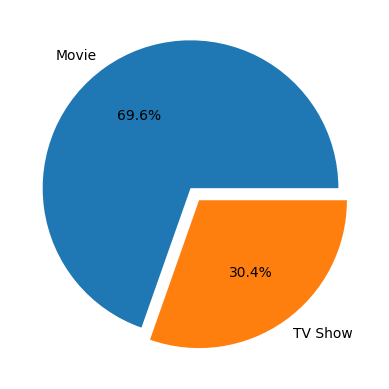

In [56]:
plt.pie(type_data['title'], explode= (0.05, 0.05), labels= type_data['type'], autopct='%.1f%%')
plt.show()

The data present here is distributed in 70:30 ratio between Movies and TV-Shows

# Analysis in terms of Movies and shows

In [57]:
movie_data= data[data['type']=='Movie']
show_data= data[data['type']=='TV Show']

In [58]:
movie_director= movie_data.groupby('directors').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[:15]
movie_director= movie_director[movie_director['directors']!= 'Unknown']
movie_director.head()

directors  title
3582  Rajiv Chilaka     22
1817      Jan Suter     21
3633    Raúl Campos     19
4261    Suhas Kadav     16
2739   Marcus Raboy     15

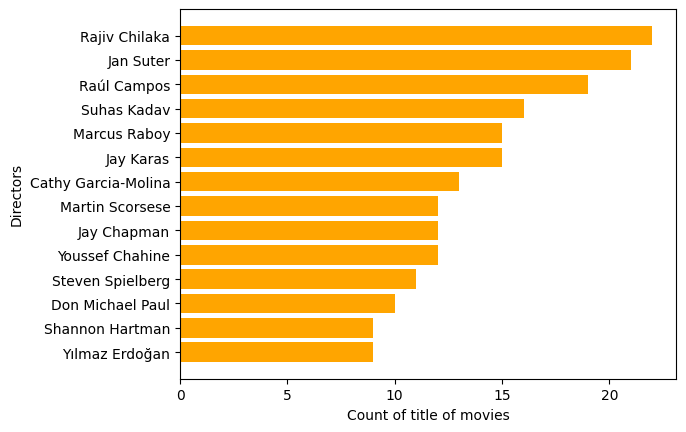

In [59]:
plt.barh(movie_director['directors'][::-1], movie_director['title'][::-1], color= 'orange')
plt.xlabel('Count of title of movies')
plt.ylabel('Directors')
plt.show()

In [60]:
show_director= show_data.groupby('directors').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[:15]
show_director= show_director[show_director['directors']!= 'Unknown']
show_director.head()

directors  title
146            Ken Burns      3
8    Alastair Fothergill      3
259          Stan Lathan      2
128        Joe Berlinger      2
100          Hsu Fu-chun      2

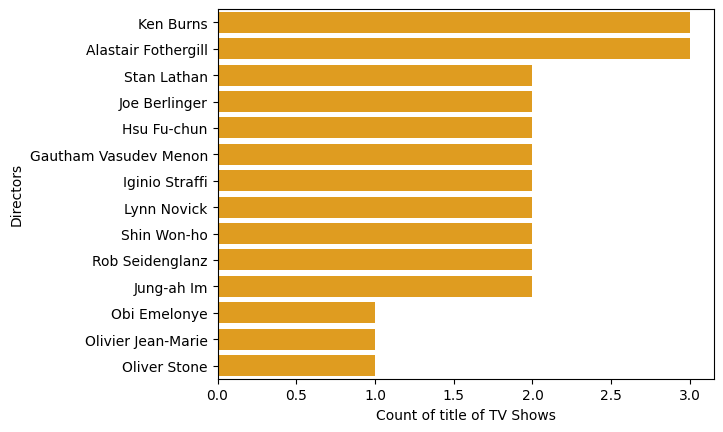

In [61]:
sns.barplot(data= show_director, y= 'directors', x= 'title', color= 'orange')
plt.xlabel('Count of title of TV Shows')
plt.ylabel('Directors')
plt.show()

Rajiv Chilaka, Jan Sutar and Raul Compos are the three directors making the most number of Movies across Netflix.

 Alastair Fothergill and Stan Lathan are the two most popular TV Shows directors.

In [62]:
movie_actor= movie_data.groupby('actor').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[1:15]
movie_actor.head()

actor  title
2105        Anupam Kher     42
21781    Shah Rukh Khan     35
17193  Naseeruddin Shah     32
18064           Om Puri     30
638        Akshay Kumar     30

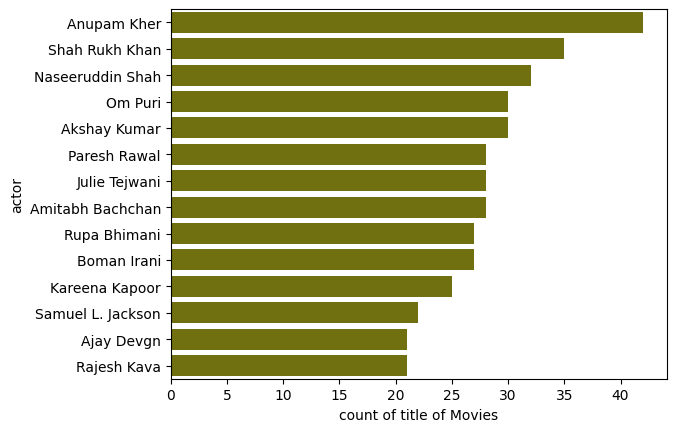

In [63]:
sns.barplot(data= movie_actor, x= 'title', y= 'actor', color= 'olive')
plt.xlabel('count of title of Movies')
plt.show()

In [64]:
show_actor= show_data.groupby('actor').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[1:15]
show_actor.head()

actor  title
13230  Takahiro Sakurai     25
14581         Yuki Kaji     19
6804     Junichi Suwabe     17
2874        Daisuke Ono     17
252           Ai Kayano     17

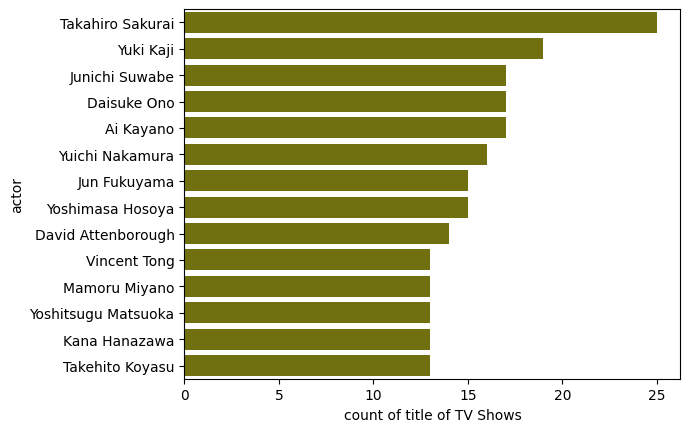

In [65]:
sns.barplot(data= show_actor, x= 'title', y= 'actor', color= 'olive')
plt.xlabel('count of title of TV Shows')
plt.show()

The above plot clearly shows that Bollywood actors are dominating the field of acting in movies. Actors such as Anupam Kher, Shah Rukh Khan, Naseeruddin Shah and Akshay Kumar are among the most popular across Netflix.

Takahiro Sakurai, Yuki Kaji are two most popular TV Show actors.

In [66]:
movie_genre= movie_data.groupby('genre').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[:15]
movie_genre.head()

genre  title
11  International Movies   2752
7                 Dramas   2427
4               Comedies   1674
6          Documentaries    869
0     Action & Adventure    859

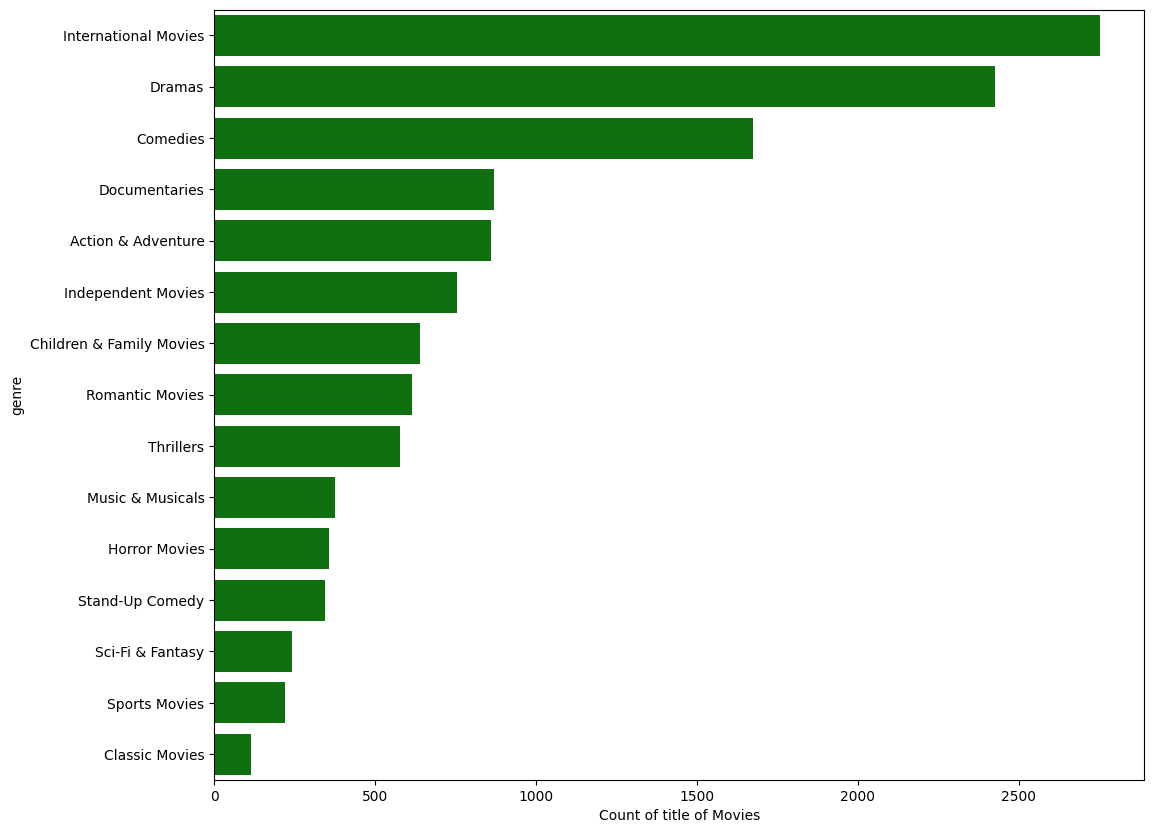

In [67]:
plt.figure(figsize= (12, 10))
sns.barplot(data= movie_genre, y= 'genre', x= 'title', color= 'green')
plt.xlabel('Count of title of Movies')
plt.show()

The three most popular genres for movies are international movies, dramas, and comedies.

In [68]:
show_genre= show_data.groupby('genre').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[:15]
show_genre.head()

genre  title
5   International TV Shows   1351
15               TV Dramas    763
14             TV Comedies    581
3           Crime TV Shows    470
6                 Kids' TV    451

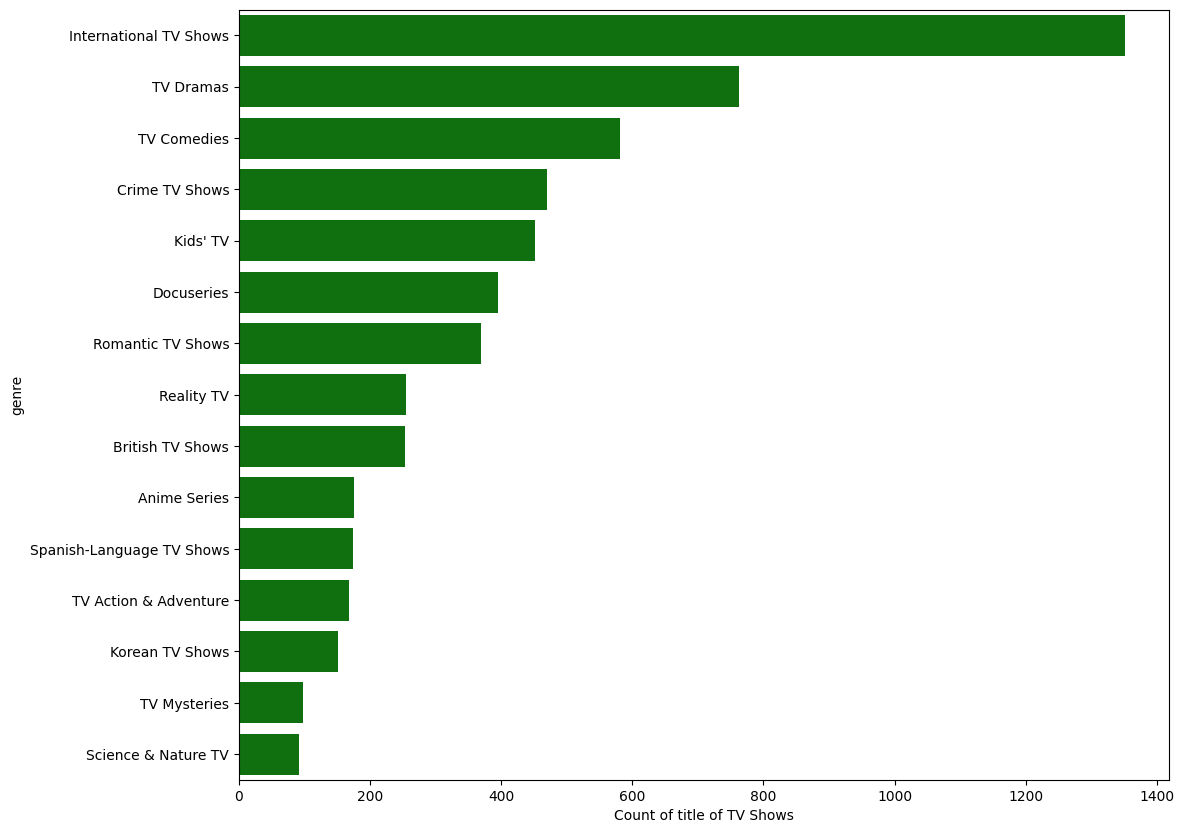

In [69]:
plt.figure(figsize= (12, 10))
sns.barplot(data= show_genre, y= 'genre', x= 'title', color= 'green')
plt.xlabel('Count of title of TV Shows')
plt.show()

International TV Shows by far the most popular genre for TV Shows followed by Dramas and comedies.

In [70]:
movie_data= movie_data[movie_data['country']!= 'Unknown Country']
movie_country= movie_data.groupby('country').agg({'title':'nunique'}).reset_index().sort_values('title', ascending= False)[:15]
movie_country.head()

country  title
115   United States   2940
44            India   1052
113  United Kingdom    556
20           Canada    334
35           France    318

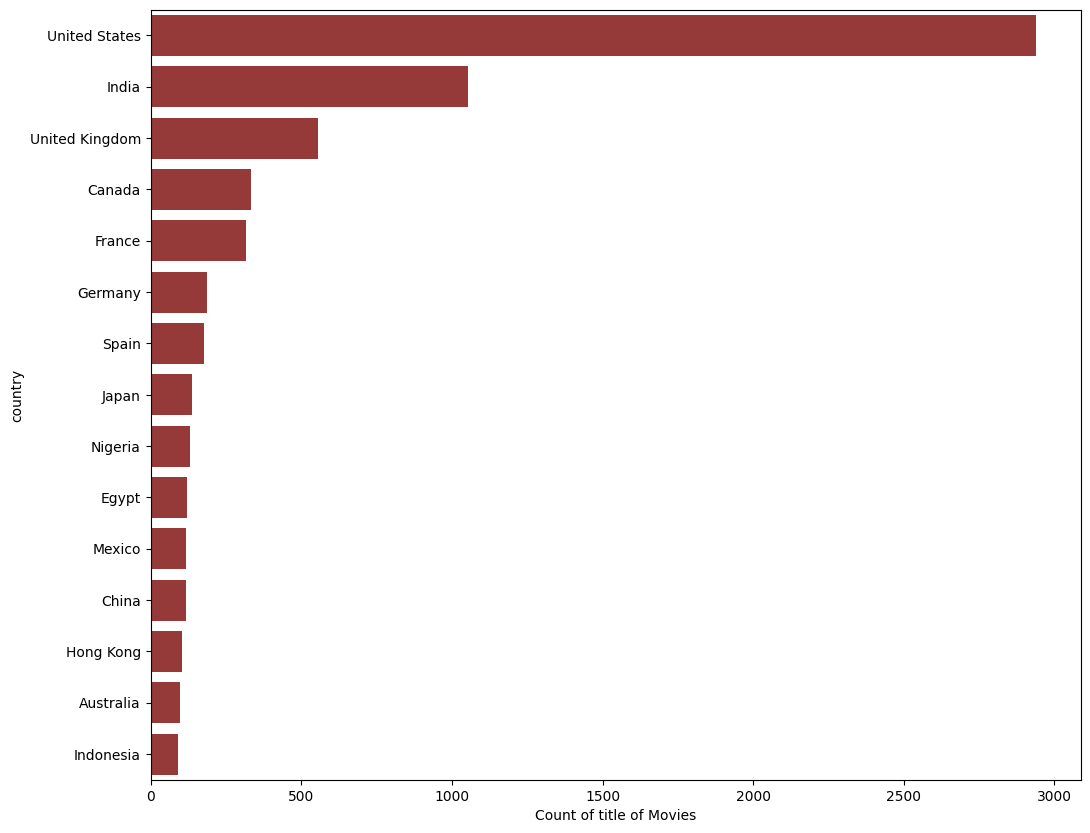

In [71]:
plt.figure(figsize= (12, 10))
sns.barplot(data= movie_country, y= 'country', x= 'title', color= 'brown')
plt.xlabel('Count of title of Movies')
plt.show()

In [72]:
show_data= show_data[show_data['country']!= 'Unknown Country']
show_country= show_data.groupby('country').agg({'title':'nunique'}).reset_index().sort_values('title', ascending= False)[:15]
show_country.head()

country  title
64   United States   1308
63  United Kingdom    273
31           Japan    200
53     South Korea    171
9           Canada    126

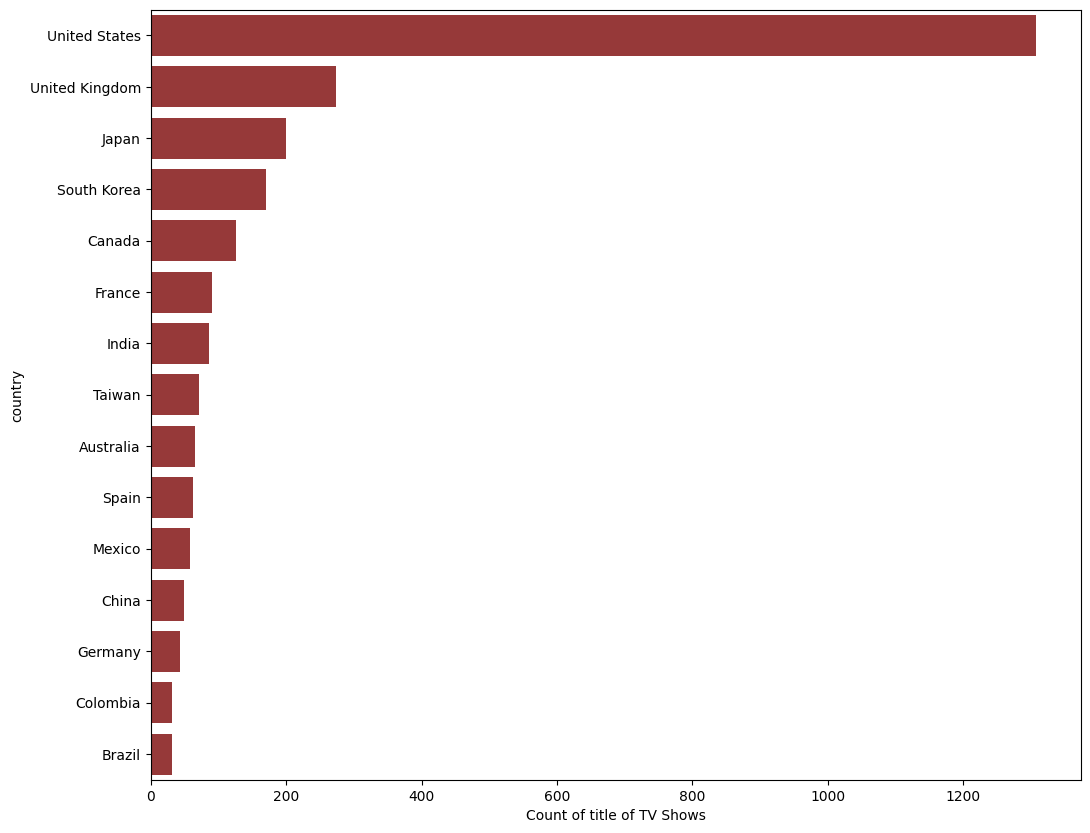

In [73]:
plt.figure(figsize= (12, 10))
sns.barplot(data= show_country, y= 'country', x= 'title', color= 'brown')
plt.xlabel('Count of title of TV Shows')
plt.show()

United States is clearly dominating in making both Movies and TV Shows and United Kingdom is also producing good amount of both movies and TV shows.

India is producing a good number of movies, while Japan is focusing more on TV shows than movies.

In [74]:
movie_release_year= movie_data.groupby('release_year').agg({'title':'nunique'}).reset_index()
movie_release_year= movie_release_year[movie_release_year['release_year']>=2000]
movie_release_year.head()

release_year  title
51          2000     33
52          2001     40
53          2002     44
54          2003     51
55          2004     55

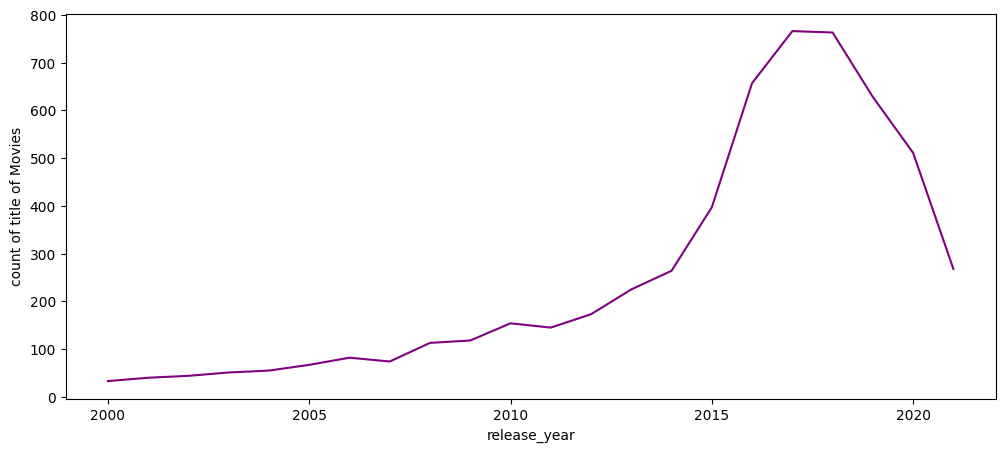

In [75]:
plt.figure(figsize= (12,5))
sns.lineplot(data= movie_release_year, y= 'title', x= 'release_year', color= 'purple')
plt.ylabel('count of title of Movies')
plt.show()

The number of movie releases took a hit after 2018, as the number of movies released decreased

In [76]:
show_release_year= show_data.groupby('release_year').agg({'title':'nunique'}).reset_index()
show_release_year= show_release_year[show_release_year['release_year']>=2000]
show_release_year.head()

release_year  title
24          2000      4
25          2001      5
26          2002      7
27          2003     10
28          2004      9

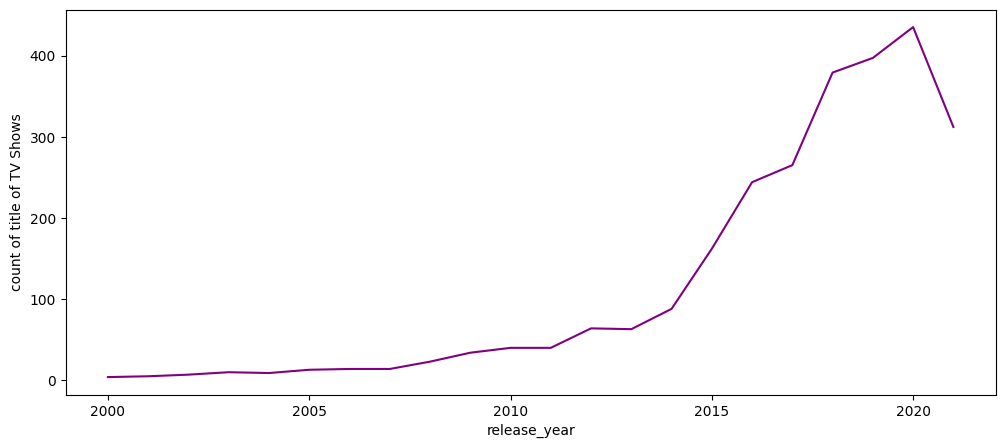

In [77]:
plt.figure(figsize= (12,5))
sns.lineplot(data= show_release_year, y= 'title', x= 'release_year', color= 'purple')
plt.ylabel('count of title of TV Shows')
plt.show()

Due to Covid-19, number of TV Shows releasing decreased after 2019.

In [78]:
movie_year= movie_data.groupby('listed_year').agg({'title': 'nunique'}).reset_index()
movie_year.head()

listed_year  title
0       2008.0      1
1       2009.0      2
2       2010.0      1
3       2011.0     13
4       2012.0      3

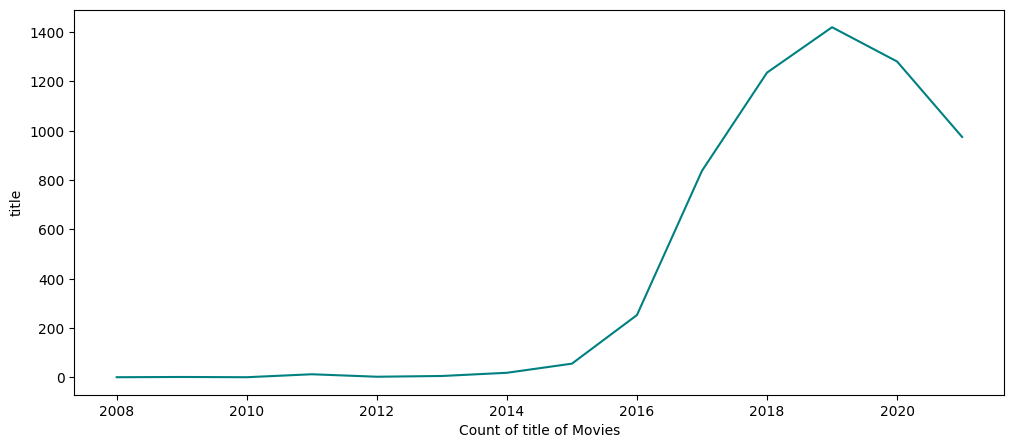

In [79]:
plt.figure(figsize= (12,5))
sns.lineplot(data= movie_year, x= 'listed_year', y= 'title', color= 'teal')
plt.xlabel('Count of title of Movies')
plt.show()

In [80]:
show_year= show_data.groupby('listed_year').agg({'title': 'nunique'}).reset_index()
show_year.head()

listed_year  title
0       2008.0      1
1       2013.0      4
2       2014.0      4
3       2015.0     17
4       2016.0    168

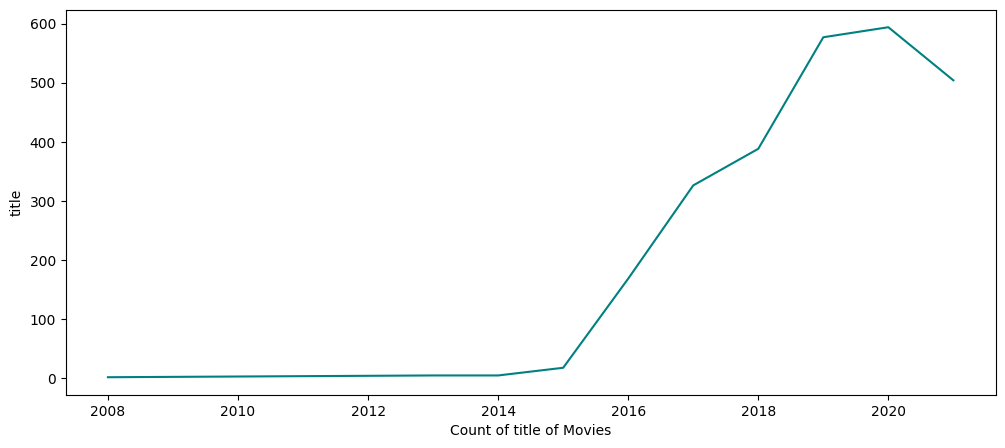

In [81]:
plt.figure(figsize= (12,5))
sns.lineplot(data= show_year, x= 'listed_year', y= 'title', color= 'teal')
plt.xlabel('Count of title of Movies')
plt.show()

The number of movies listed decreased after 2019.

The overall content listing on Netflix has decreased since 2020 due to Covid-19.

In [82]:
movie_month= movie_data.groupby('month').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
movie_month

month  title
5        July    558
0       April    547
2    December    547
10    October    545
4     January    544
7       March    525
1      August    515
11  September    515
9    November    498
6        June    490
8         May    439
3    February    381

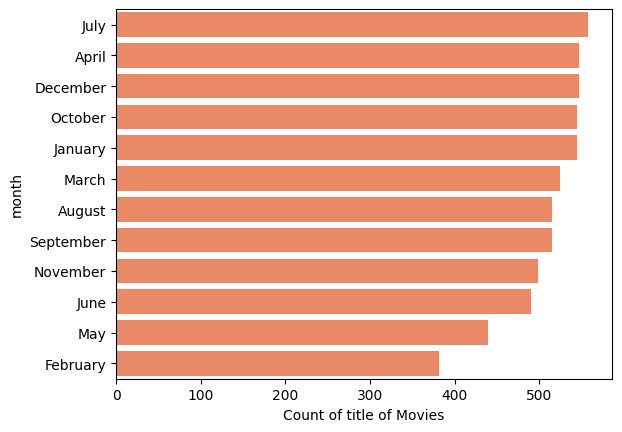

In [83]:
sns.barplot(data= movie_month, x= 'title', y= 'month', color= 'coral')
plt.xlabel('Count of title of Movies')
plt.show()

In [84]:
show_month= show_data.groupby('month').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
show_month

month  title
5        July    258
2    December    250
11  September    248
6        June    231
1      August    230
10    October    210
0       April    209
7       March    205
9    November    200
8         May    186
4     January    181
3    February    175

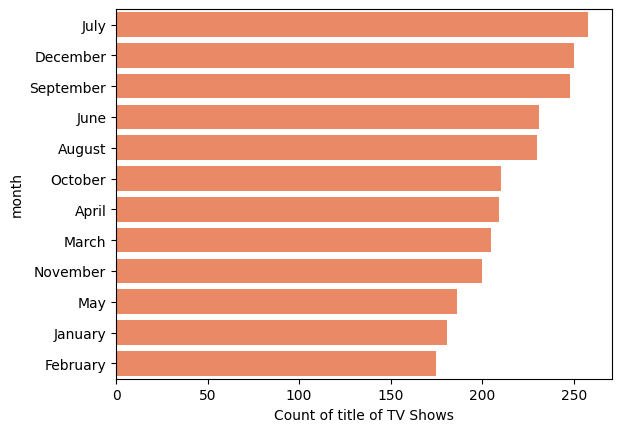

In [85]:
sns.barplot(data= show_month, x= 'title', y= 'month', color= 'coral')
plt.xlabel('Count of title of TV Shows')
plt.show()

July being the best month of adding overall content on Netflix.

Most number of Movies are listed in April and October whereas December and September is best for TV Shows.

In [86]:
movie_duration= movie_data.groupby('duration')['title'].nunique().reset_index().sort_values('title', ascending= False)
movie_duration.head()

duration  title
6   80-100   2214
1  100-120   1667
2  120-150    895
5    50-80    799
0     1-50    284

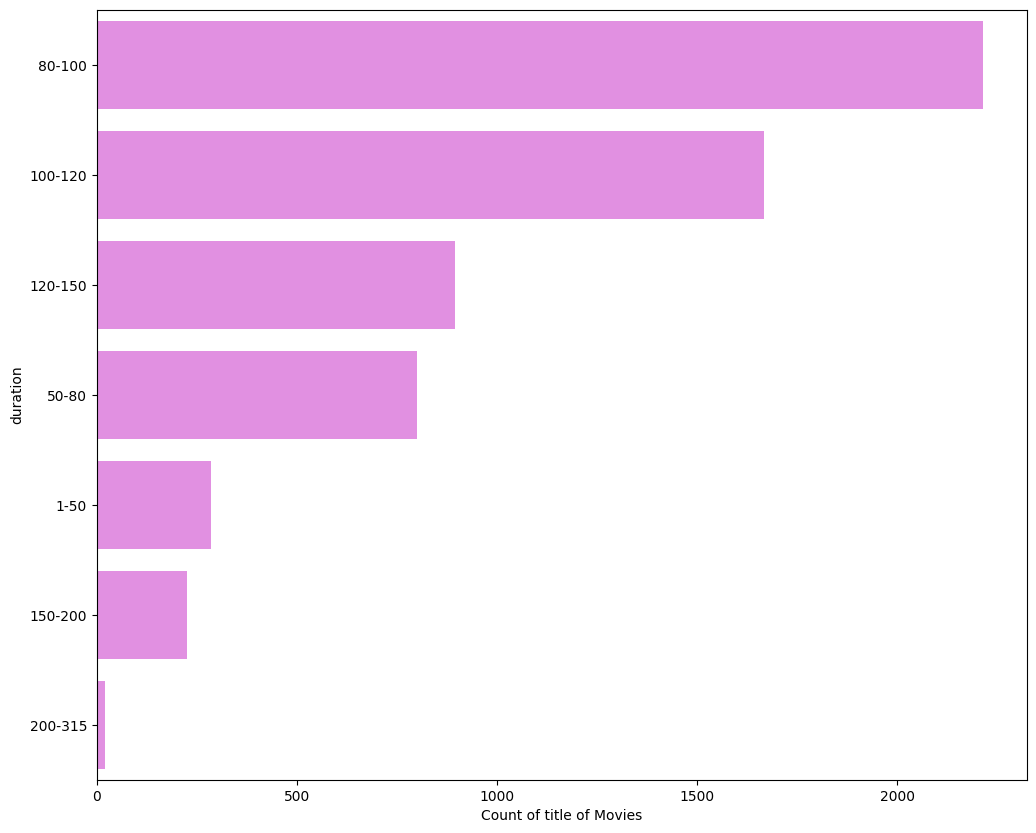

In [87]:
plt.figure(figsize= (12, 10))
sns.barplot(data= movie_duration, x= 'title', y= 'duration', color= 'violet')
plt.xlabel('Count of title of Movies')
plt.show()

Most number of movies have duration of between 80-100 and 100-120.

In [88]:
show_duration= show_data.groupby('duration')['title'].nunique().reset_index().sort_values('title', ascending= False)
show_duration.head()

duration  title
0    1 Season   1788
7   2 Seasons    425
8   3 Seasons    199
9   4 Seasons     95
10  5 Seasons     65

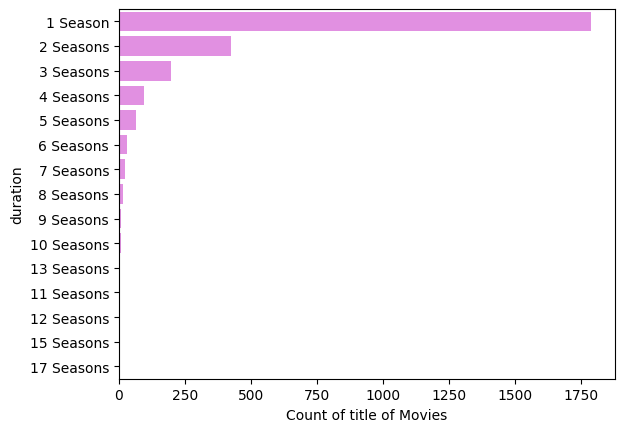

In [89]:
sns.barplot(data= show_duration, x= 'title', y= 'duration', color= 'violet')
plt.xlabel('Count of title of Movies')
plt.show()

TV shows having only 1 season is most popular. As length of seasons increased, popularity decreased.

We will analyze the top countries that provide top-quality content on Netflix for both movies and TV shows, focusing on the United States and India for both movies and TV shows, and Japan and South Korea for TV shows.

# United States

In [90]:
# first analyse data for United States
us_movie= data[(data['country']== 'United States')& (data['type']== 'Movie')]
us_shows= data[(data['country']== 'United States')& (data['type']== 'TV Show')]

In [91]:
us_data= data[data['country']== 'United States']
us_type= us_data.groupby('type').agg({'title': 'nunique'}).reset_index()
us_type

type  title
0    Movie   2940
1  TV Show   1308

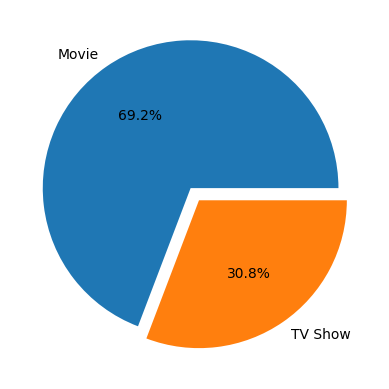

In [92]:
plt.pie(us_type['title'], explode= (0.05, 0.05), labels= us_type['type'], autopct='%.1f%%')
plt.show()

Distribution of Movies and TV shows in United States is almost 70 to 30 ratio.

In [93]:
us_movie_genre= us_movie.groupby('genre').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[:10]
us_movie_genre.head()

genre  title
7                    Dramas    850
4                  Comedies    711
6             Documentaries    564
2  Children & Family Movies    443
0        Action & Adventure    415

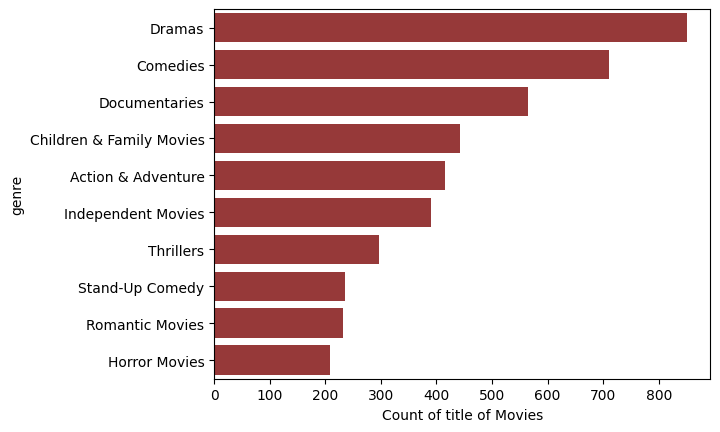

In [94]:
sns.barplot(data= us_movie_genre, x= 'title', y= 'genre', color= 'brown')
plt.xlabel('Count of title of Movies')
plt.show()

Drama, Comedies and Documentaries are three most popular genres for Movies in US.

In [95]:
us_show_genre= us_shows.groupby('genre').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[:10]
us_show_genre.head()

genre  title
14             TV Comedies    330
15               TV Dramas    328
6                 Kids' TV    294
5   International TV Shows    281
4               Docuseries    255

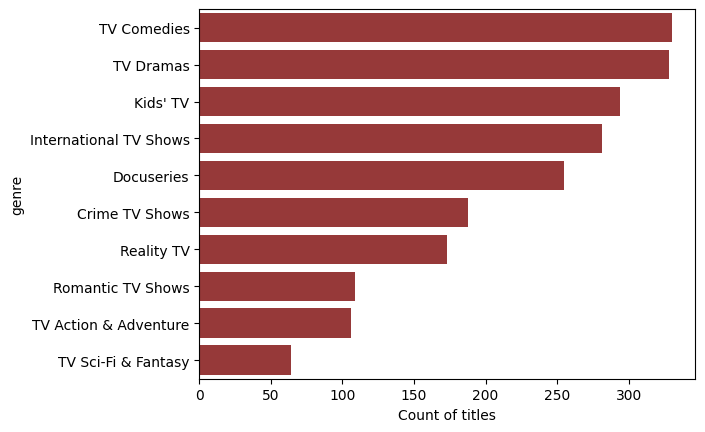

In [96]:
sns.barplot(data= us_show_genre, x= 'title', y= 'genre', color= 'brown')
plt.xlabel('Count of titles')
plt.show()

TV Drama, TV Comedies and Kids' TV are the most popular genres for TV shows in US.

In [97]:
us_movie_director= us_movie.groupby('directors').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[:10]
us_movie_director= us_movie_director[us_movie_director['directors']!= 'Unknown']
us_movie_director.head()

directors  title
1402      Marcus Raboy     15
934          Jay Karas     15
933        Jay Chapman     12
1449   Martin Scorsese     12
2118  Steven Spielberg     11

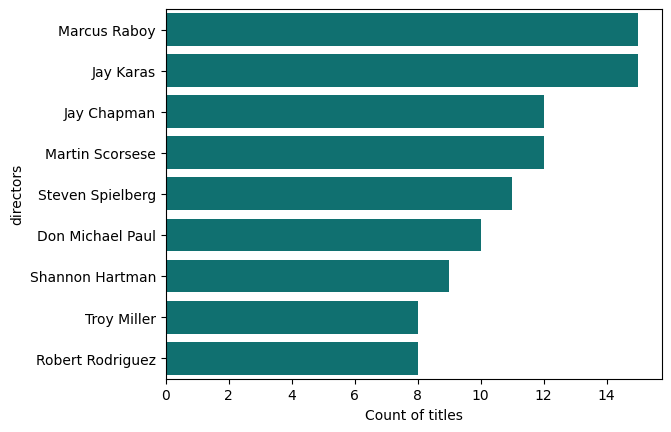

In [98]:
sns.barplot(data= us_movie_director, x= 'title', y= 'directors', color= 'teal')
plt.xlabel('Count of titles')
plt.show()

Marcus Raboy, Jay karas and Jay Chapman are three most popular directors across Movies in USA

In [99]:
us_show_director= us_shows.groupby('directors').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[:10]
us_show_director= us_show_director[us_show_director['directors']!= 'Unknown']
us_show_director.head()

directors  title
55        Ken Burns      3
92      Stan Lathan      2
48    Joe Berlinger      2
86  Rob Seidenglanz      2
63      Lynn Novick      2

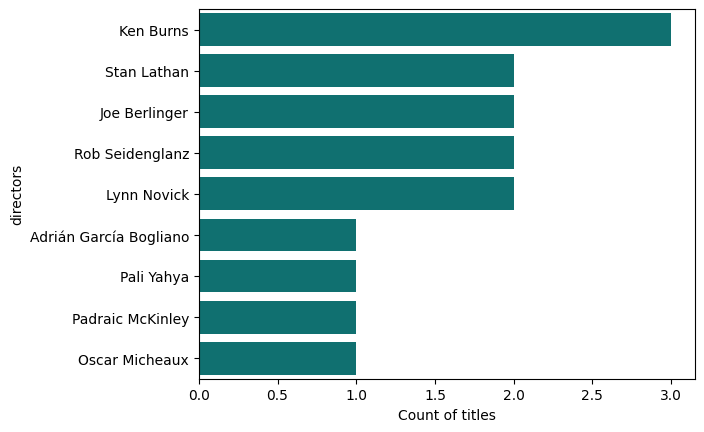

In [100]:
sns.barplot(data= us_show_director, x= 'title', y= 'directors', color= 'teal')
plt.xlabel('Count of titles')
plt.show()

Stan Lathan, Ken Burns and Joe Berlinger are most popular directors across TV Shows in USA.

In [101]:
us_movie_actor= us_movie.groupby('actor').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[1:10]
us_movie_actor= us_movie_actor[us_movie_actor['actor']!= 'Unknown']
us_movie_actor.head()

actor  title
10109  Samuel L. Jackson     22
109         Adam Sandler     20
4807        James Franco     19
8585        Nicolas Cage     18
3865     Fred Tatasciore     17

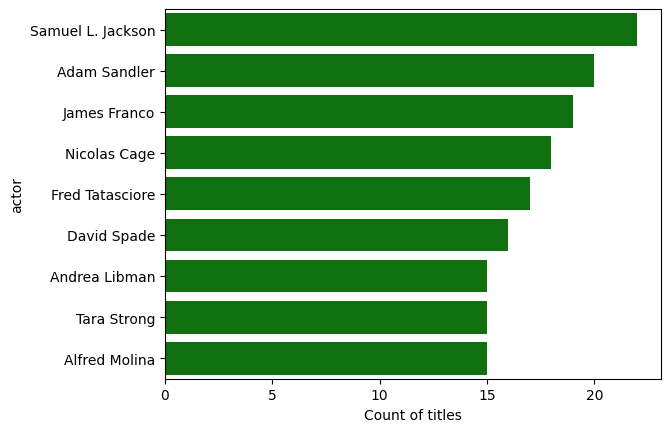

In [102]:
sns.barplot(data= us_movie_actor, x= 'title', y= 'actor', color= 'green')
plt.xlabel('Count of titles')
plt.show()

Samuel L. Jackson, James Franco, Nicolas Cage and Adam Sandler are the most popular actors across movies in USA.

In [103]:
us_show_actor= us_shows.groupby('actor').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[1:10]
us_show_actor= us_show_actor[us_show_actor['actor']!= 'Unknown']
us_show_actor.head()

actor  title
6580              Vincent Tong     10
2306              Grey Griffin     10
3577  Kevin Michael Richardson      9
3405             Kari Wahlgren      8
3124         Johnny Yong Bosch      8

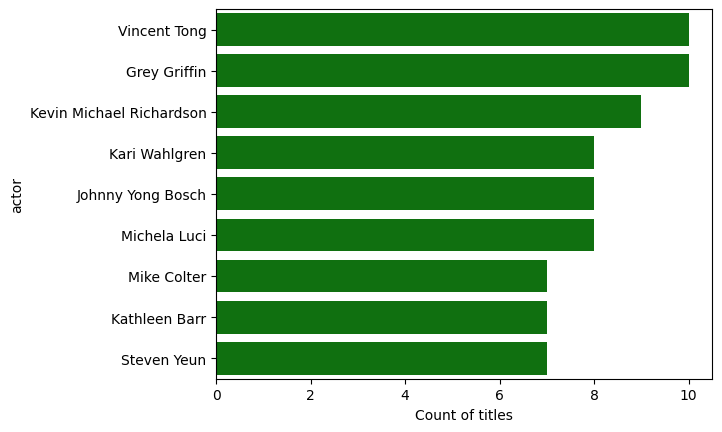

In [104]:
sns.barplot(data= us_show_actor, x= 'title', y= 'actor', color= 'green')
plt.xlabel('Count of titles')
plt.show()

For TV Shows, most popular actors are Vincent Tong, Grey Griffin and Kevin Michael Richardson.

In [105]:
us_rating_data= us_movie.groupby('rating').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
us_rating_data.head()

rating  title
8  TV-MA    778
5      R    668
4  PG-13    438
6  TV-14    307
3     PG    249

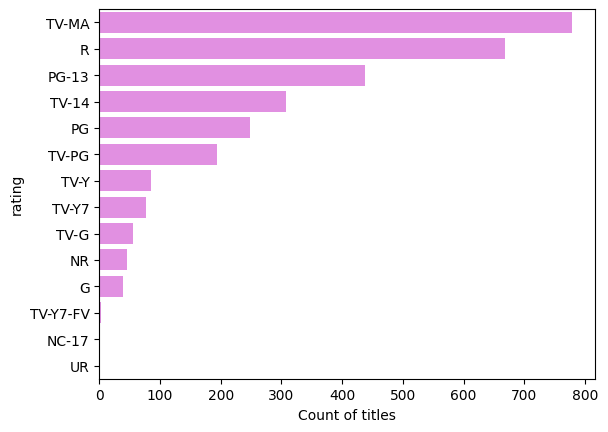

In [106]:
sns.barplot(data= us_rating_data, x= 'title', y= 'rating', color= 'violet')
plt.xlabel('Count of titles')
plt.show()

In [107]:
us_rating_show= us_shows.groupby('rating').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
us_rating_show.head()

rating  title
4  TV-MA    509
2  TV-14    322
5  TV-PG    178
7  TV-Y7    133
6   TV-Y    108

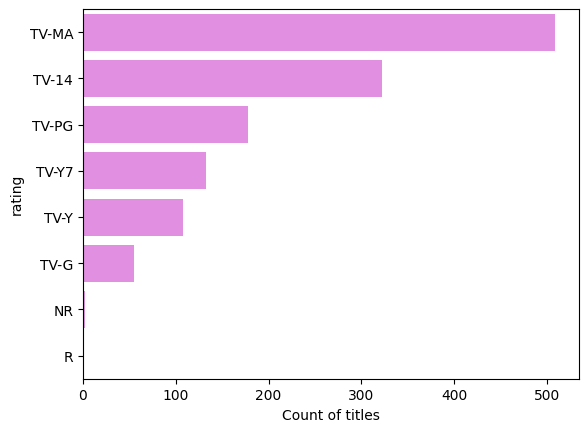

In [108]:
sns.barplot(data= us_rating_show, x= 'title', y= 'rating', color= 'violet')
plt.xlabel('Count of titles')
plt.show()

Matured Content for adults is most popular rating category in US across both movies and TV Shows.

TV-MA and TV-14 are also quite popular rating categories in both movies and TV shows.

In [109]:
us_duration_movie= us_movie.groupby('duration').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
us_duration_movie.head()

duration  title
6   80-100   1244
1  100-120    715
5    50-80    490
2  120-150    249
0     1-50    198

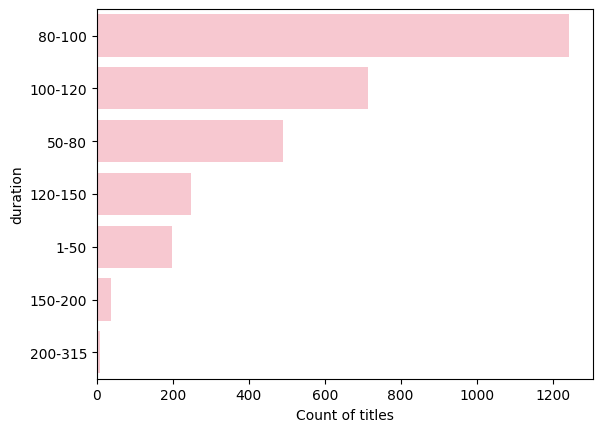

In [110]:
sns.barplot(data= us_duration_movie, x= 'title', y= 'duration', color= 'pink')
plt.xlabel('Count of titles')
plt.show()

Above plot clearly shows that 80-120 is the best duration of a movie in US.

In [111]:
us_duration_show= us_shows.groupby('duration').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
us_duration_show.head()

duration  title
0    1 Season    811
7   2 Seasons    197
8   3 Seasons    114
9   4 Seasons     68
10  5 Seasons     41

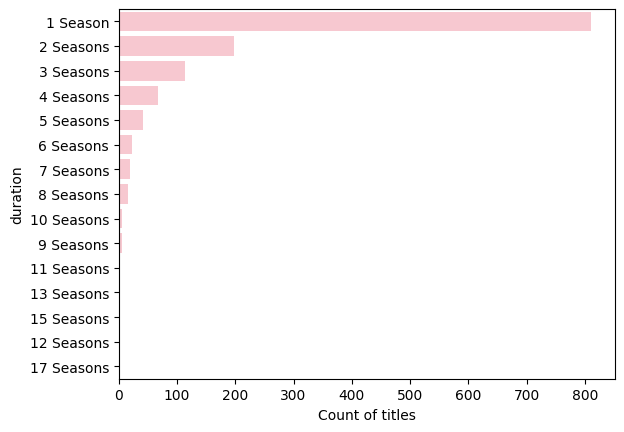

In [112]:
sns.barplot(data= us_duration_show, x= 'title', y= 'duration', color= 'pink')
plt.xlabel('Count of titles')
plt.show()

Above plot clearly shows as the seasons of a TV Show increases, the popularity of the shows decreases.

In [113]:
us_movie= us_movie[us_movie['release_year']>= 2000]
us_release_movie= us_movie.groupby('release_year').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
us_release_movie.head()

release_year  title
17          2017    377
18          2018    340
16          2016    298
19          2019    293
20          2020    219

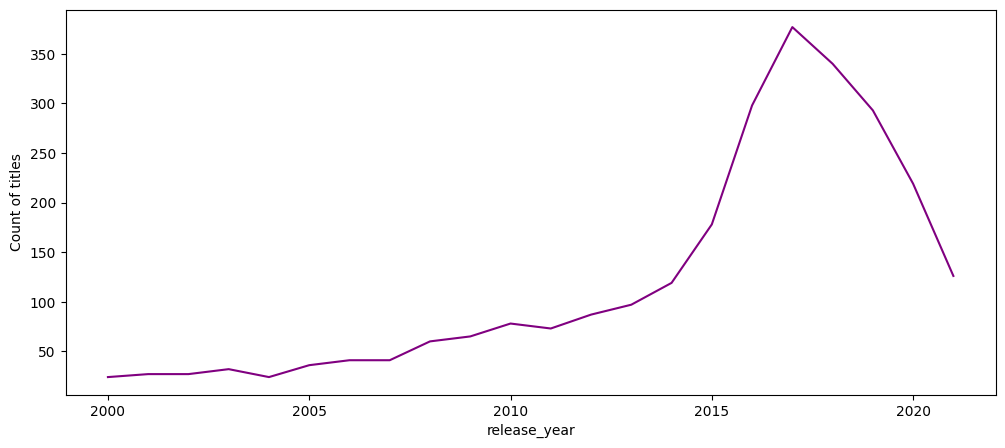

In [114]:
plt.figure(figsize= (12, 5))
sns.lineplot(data= us_release_movie, y= 'title', x= 'release_year', color= 'purple')
plt.ylabel('Count of titles')
plt.show()

We can see that number of movies released every year increased till 2017 but after it decreased.

In [115]:
us_shows= us_shows[us_shows['release_year']>= 2000]
us_release_show= us_shows.groupby('release_year').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
us_release_show.head()

release_year  title
20          2020    224
19          2019    207
21          2021    196
18          2018    194
17          2017    111

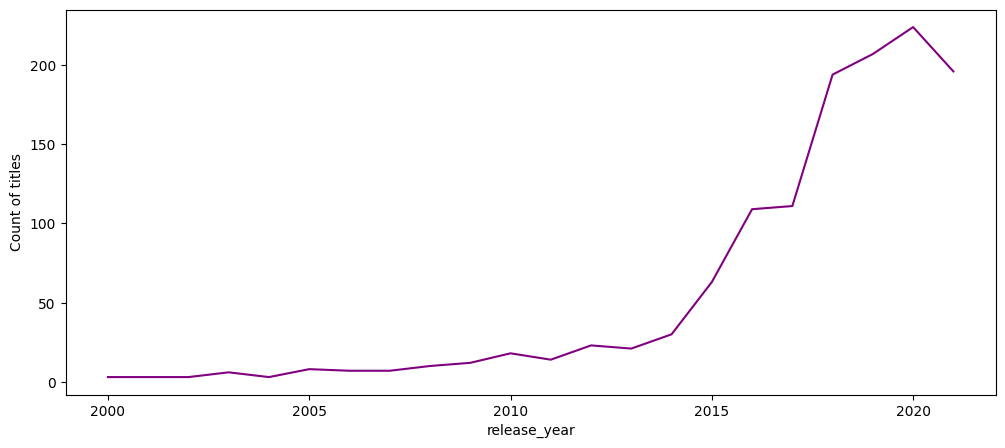

In [116]:
plt.figure(figsize= (12, 5))
sns.lineplot(data= us_release_show, y= 'title', x= 'release_year', color= 'purple')
plt.ylabel('Count of titles')
plt.show()

We can see an increase in the number of TV shows releasing every year until 2020, but it took a hit afterward due to COVID-19.

In [117]:
us_movie_year= us_movie.groupby('listed_year').agg({'title': 'nunique'}).reset_index()
us_movie_year.head()

listed_year  title
0       2008.0      1
1       2009.0      1
2       2011.0      1
3       2012.0      3
4       2013.0      5

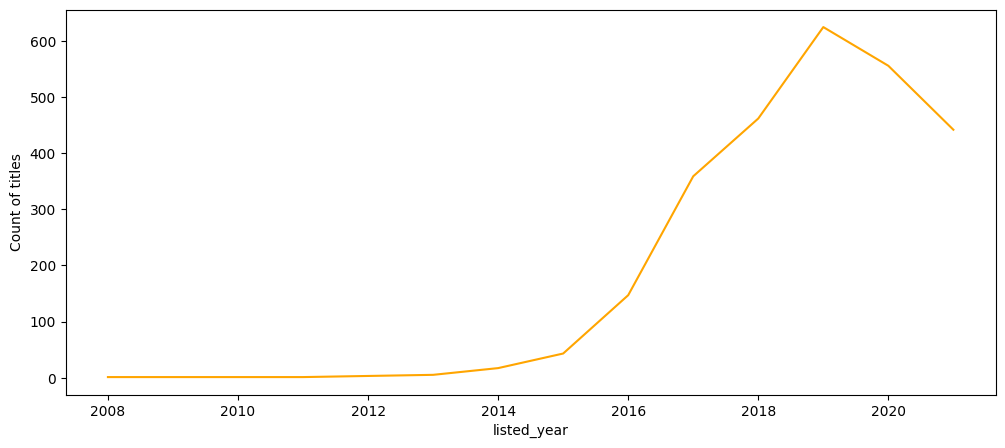

In [118]:
plt.figure(figsize= (12, 5))
sns.lineplot(data= us_movie_year, x= 'listed_year', y= 'title', color= 'orange')
plt.ylabel('Count of titles')
plt.show()

In [119]:
us_show_year= us_shows.groupby('listed_year').agg({'title': 'nunique'}).reset_index()
us_show_year.head()

listed_year  title
0       2008.0      1
1       2013.0      4
2       2014.0      3
3       2015.0     10
4       2016.0     57

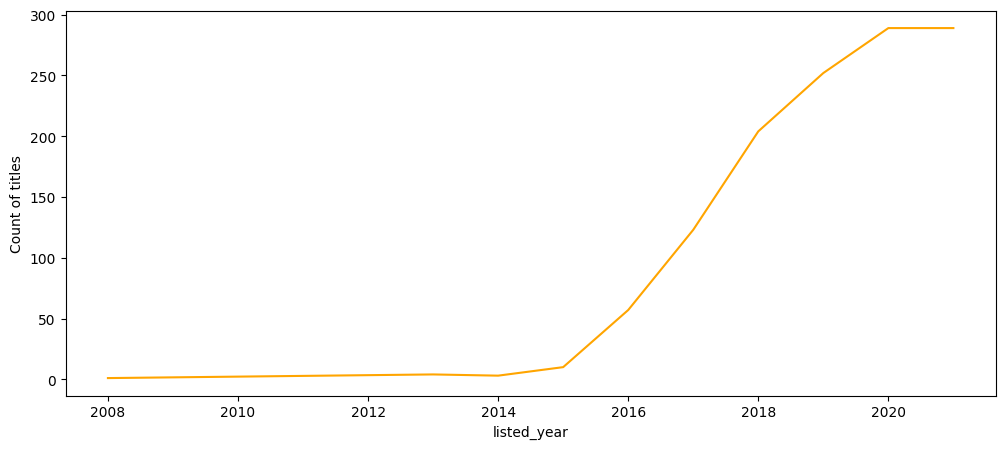

In [120]:
plt.figure(figsize= (12, 5))
sns.lineplot(data= us_show_year, x= 'listed_year', y= 'title', color= 'orange')
plt.ylabel('Count of titles')
plt.show()

We can see Movies listed every year in US increased till 2019 but after it decreased due to Covid-19 but overall there is no change in TV shows even after 2020.

In [121]:
us_movie_month= us_movie.groupby('month').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
us_movie_month

month  title
4     January    282
5        July    249
11  September    237
10    October    229
0       April    227
1      August    227
2    December    221
9    November    214
7       March    206
6        June    204
8         May    192
3    February    174

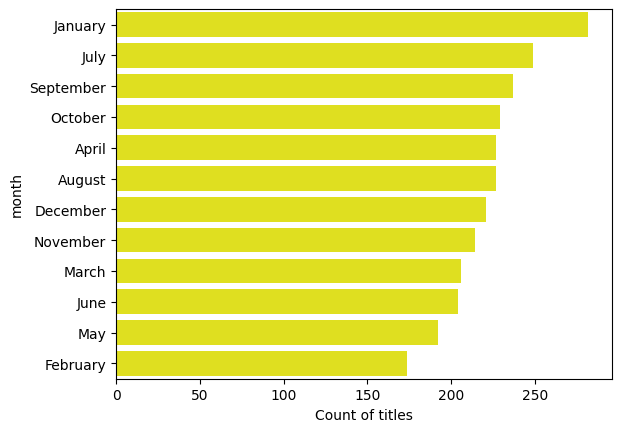

In [122]:
sns.barplot(data= us_movie_month, y= 'month', x= 'title', color= 'yellow')
plt.xlabel('Count of titles')
plt.show()

In [123]:
us_show_month= us_shows.groupby('month').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
us_show_month

month  title
11  September    136
5        July    119
6        June    116
1      August    112
2    December    106
10    October    101
0       April     97
8         May     96
9    November     95
4     January     89
7       March     83
3    February     82

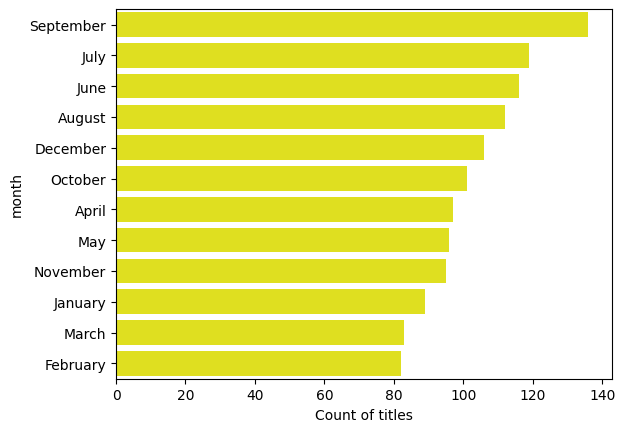

In [124]:
sns.barplot(data= us_show_month, y= 'month', x= 'title', color= 'yellow')
plt.xlabel('Count of titles')
plt.show()

The best times to list a movie or TV Show on Netflix across the US are the middle months of the year.

In [125]:
us_movie['actor_director_combination']= us_movie['actor'].str.cat(us_movie['directors'], sep= ' and ')
us_movie= us_movie[~us_movie['actor_director_combination'].str.contains('Unknown')]

In [126]:
us_movie_combination= us_movie.groupby('actor_director_combination').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[:20]
us_movie_combination.head()

actor_director_combination  title
12542      Maisie Benson and Stanley Moore      5
18236  Tabitha St. Germain and Ishi Rudell      5
1597         Ashleigh Ball and Ishi Rudell      5
15212             Paul Killam and Alex Woo      5
15213        Paul Killam and Stanley Moore      5

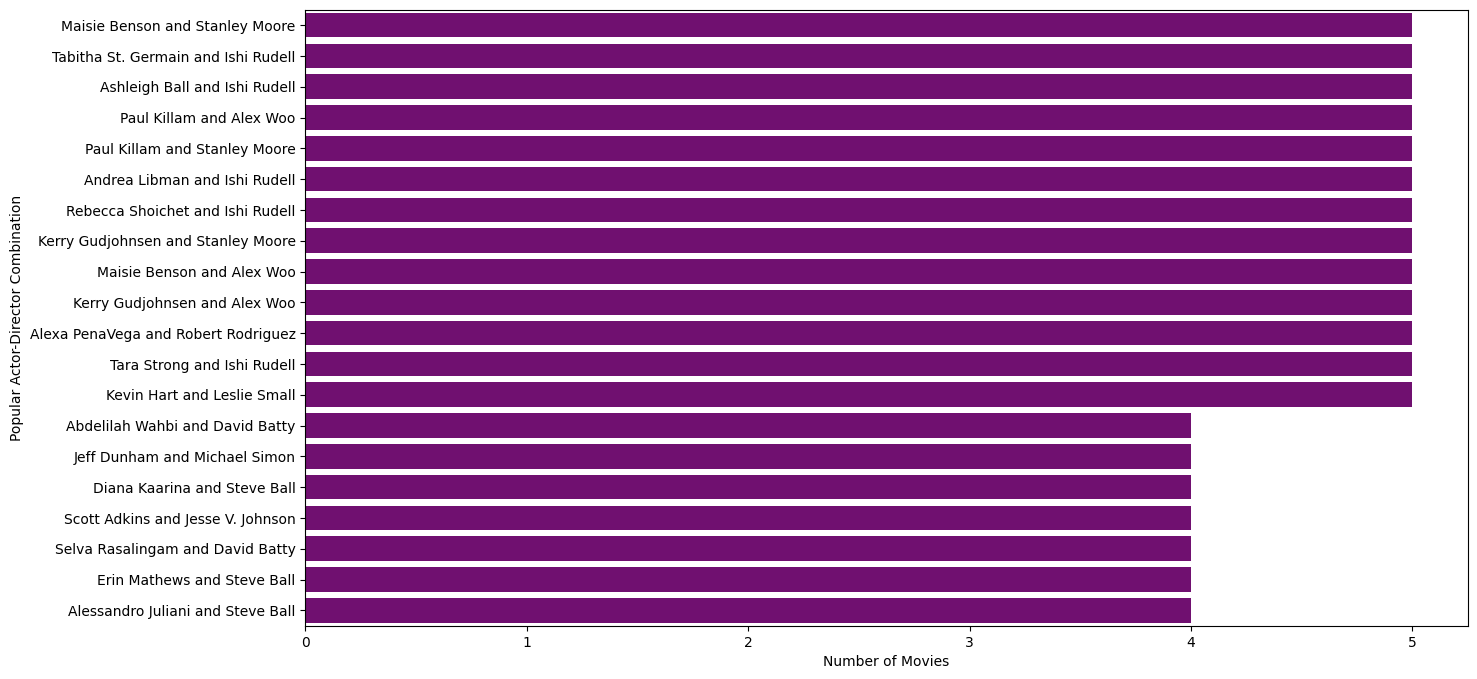

In [127]:
plt.figure(figsize= (15, 8))
sns.barplot(data= us_movie_combination, x= 'title', y= 'actor_director_combination', color= 'purple')
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

**The most popular actor-director combiantions across Movies in the US are :-**

'Tabitha St. Germain and Ishi Rudell'

'Alexa PenaVega and Robert Rodriguez'

'Maisie Benson and Alex Woo'

'Kevin Hart and Leslie Small'

'Andrea Libman and Ishi Rudell'

'Paul Killam and Stanley Moore'

'Paul Killam and Alex Woo'

'Kerry Gudjohnsen and Stanley Moore'

'Kerry Gudjohnsen and Alex Woo'

 'Rebecca Shoichet and Ishi Rudell'

In [128]:
us_shows['actor_director_combination']= us_shows['actor'].str.cat(us_shows['directors'], sep= ' and ')
us_shows= us_shows[~us_shows['actor_director_combination'].str.contains('Unknown')]

In [129]:
us_show_combination= us_shows.groupby('actor_director_combination').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[:20]
us_show_combination.head()

actor_director_combination  title
116     Dave Chappelle and Stan Lathan      2
0           Aaron Douglas and Eli Roth      1
290     Manuel Rubey and David Schalko      1
301           Marty Adams and Eli Roth      1
300  Martin Short and Tony Collingwood      1

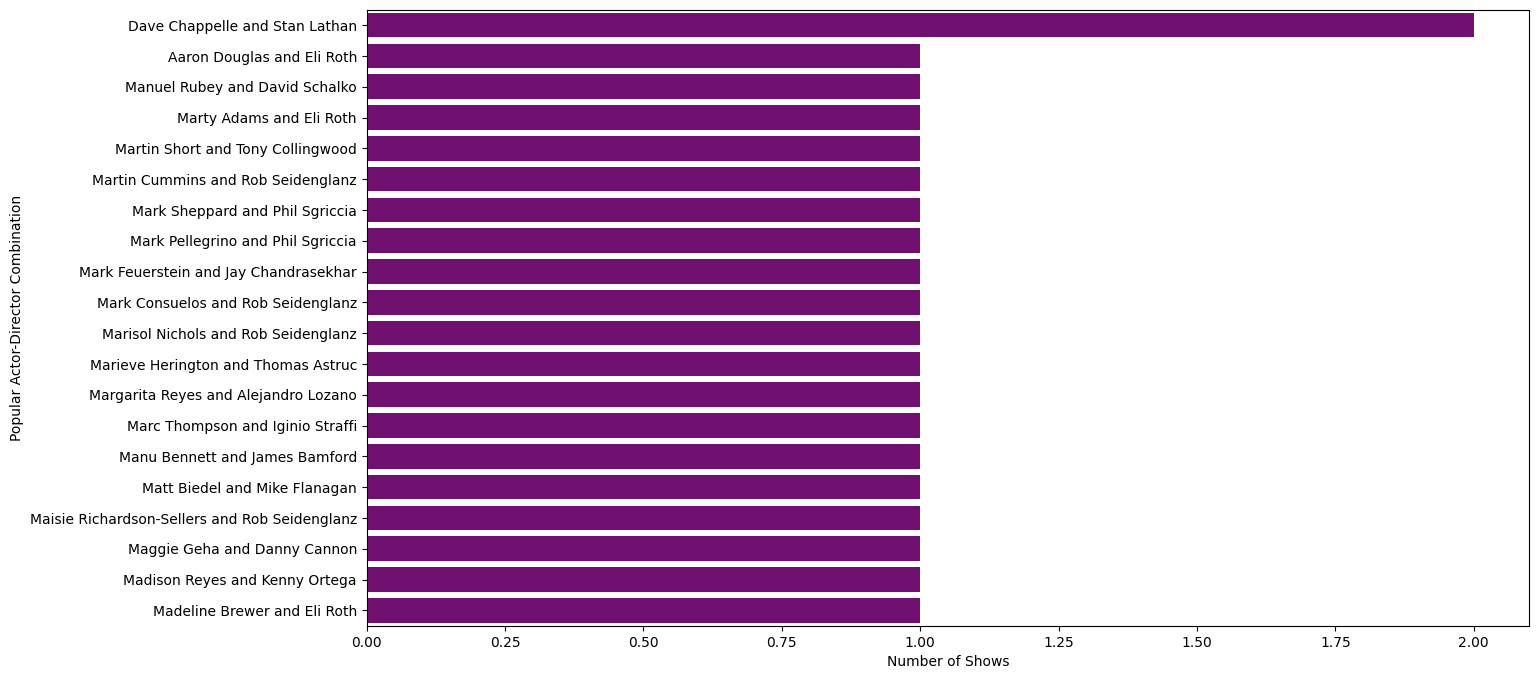

In [130]:
plt.figure(figsize= (15, 8))
sns.barplot(data= us_show_combination, x= 'title', y= 'actor_director_combination', color= 'purple')
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

**The most popular actor-director combiantions across TV Shows in the US are :-**

'Dave Chappelle and Stan Lathan'

'Aaron Douglas and Eli Roth'

'Manu Bennett and James Bamford'

'Marty Adams and Eli Roth'

'Martin Short and Tony Collingwood'

'Martin Cummins and Rob Seidenglanz'

'Mark Sheppard and Phil Sgriccia'

'Mark Pellegrino and Phil Sgriccia'

'Mark Feuerstein and Jay Chandrasekhar'

'Mark Consuelos and Rob Seidenglanz'

# India

In [131]:
# now analyse for India
india_movie= data[(data['country']== 'India') & (data['type']== 'Movie')]
india_shows= data[(data['country']== 'India') & (data['type']== 'TV Show')]

In [132]:
india_data= data[data['country']== 'India']
india_type= india_data.groupby('type').agg({'title': 'nunique'}).reset_index()

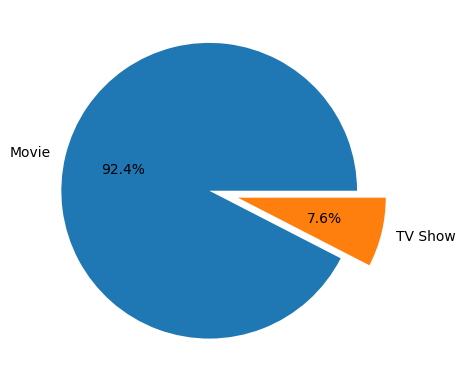

In [133]:
plt.pie(india_type['title'], labels= india_type['type'],  explode= (0.1, 0.1), autopct='%.1f%%')
plt.show()

Above plot clearly shows that movies are more popular in India as compared to TV Shows.

In [134]:
india_movie_genre= india_movie.groupby('genre').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[1:10]
india_movie_genre.head()

genre  title
6               Dramas    687
3             Comedies    343
9   Independent Movies    170
0   Action & Adventure    149
14     Romantic Movies    122

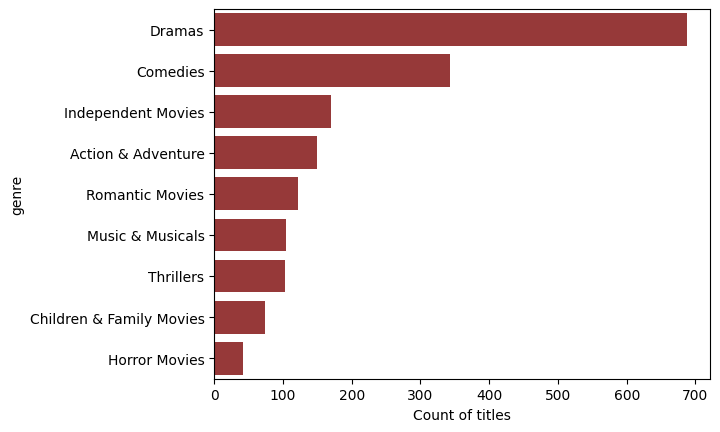

In [135]:
sns.barplot(data= india_movie_genre, x= 'title', y= 'genre', color= 'brown')
plt.xlabel('Count of titles')
plt.show()

In [136]:
india_show_genre= india_shows.groupby('genre').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[1:10]
india_show_genre.head()

genre  title
10          TV Dramas     29
9         TV Comedies     26
4            Kids' TV     13
6   Romantic TV Shows     12
2          Docuseries      9

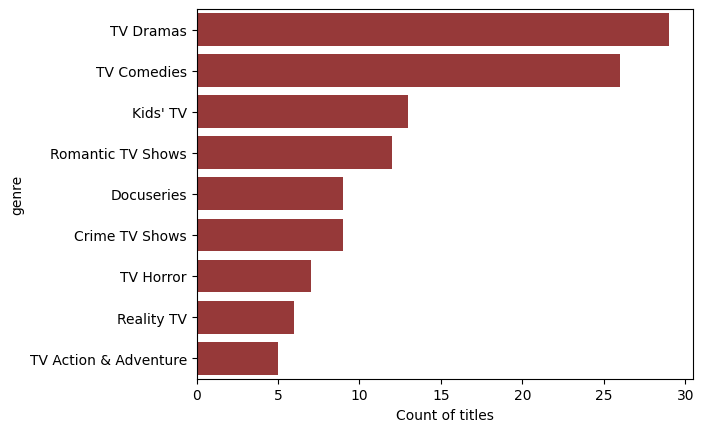

In [137]:
sns.barplot(data= india_show_genre, x= 'title', y= 'genre', color= 'brown')
plt.xlabel('Count of titles')
plt.show()

Both plot clearly shows that Dramas and Comedies are most popular genres across Movies and TV Shows in India.

In [138]:
india_movie_director= india_movie.groupby('directors').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[:15]
india_movie_director= india_movie_director[india_movie_director['directors']!= 'Unknown']
india_movie_director.head()

directors  title
465   Rajiv Chilaka     22
636     Suhas Kadav     16
152    David Dhawan      9
683     Umesh Mehra      8
83   Anurag Kashyap      8

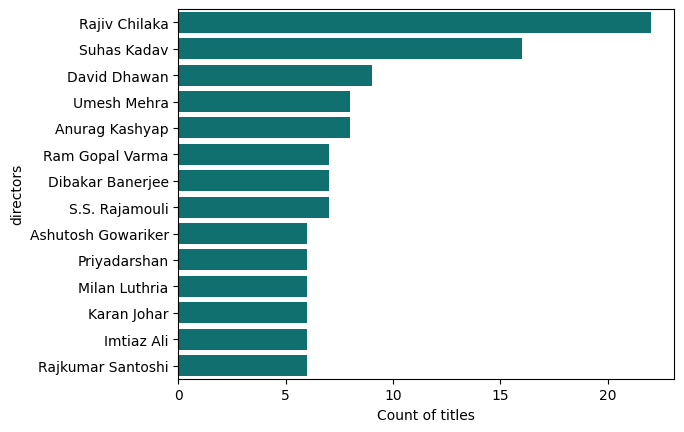

In [139]:
sns.barplot(data= india_movie_director, x= 'title', y= 'directors', color= 'teal')
plt.xlabel('Count of titles')
plt.show()

Rajiv Chilaka, Suhas Kadav and David Dhawan are the three most popular directors across Movies in India

In [140]:
india_show_director= india_shows.groupby('directors').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[:15]
india_show_director= india_show_director[india_show_director['directors']!= 'Unknown']
india_show_director.head()

directors  title
12  Gautham Vasudev Menon      2
0        Abhishek Chaubey      1
26          Sudha Kongara      1
21    Rathindran R Prasad      1
22          Sankalp Reddy      1

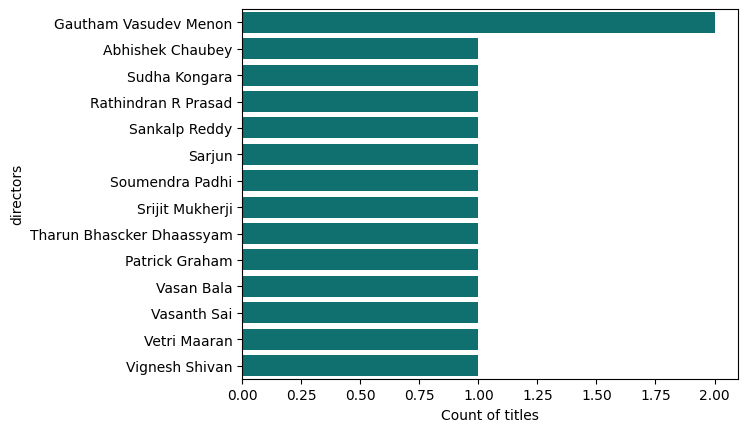

In [141]:
sns.barplot(data= india_show_director, x= 'title', y= 'directors', color= 'teal')
plt.xlabel('Count of titles')
plt.show()

Gautam Vasudev Menon is the only director who has directed more than one TV show. Rest all directors are one time directors only.

In [142]:
india_movie_actor= india_movie.groupby('actor').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[:15]
india_movie_actor= india_movie_actor[india_movie_actor['actor']!= 'Unknown']
india_movie_actor.head()

actor  title
365        Anupam Kher     40
2924    Shah Rukh Khan     35
1967  Naseeruddin Shah     32
138       Akshay Kumar     29
2110           Om Puri     29

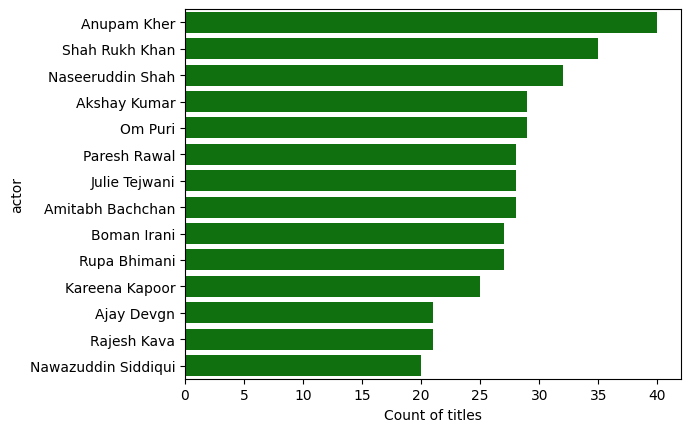

In [143]:
sns.barplot(data= india_movie_actor, x= 'title', y= 'actor', color= 'green')
plt.xlabel('Count of titles')
plt.show()

Anupam Kher, Shahrukh Khan, Naseeruddin Shah, Akshay Kumar and Om Puri are the most popular actors across Movies in India.

In [144]:
india_show_actor= india_shows.groupby('actor').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[:15]
india_show_actor= india_show_actor[india_show_actor['actor']!= 'Unknown']
india_show_actor.head()

actor  title
247    Rajesh Kava      3
205  Nishka Raheja      3
224    Prakash Raj      2
281   Sabina Malik      2
37          Anjali      2

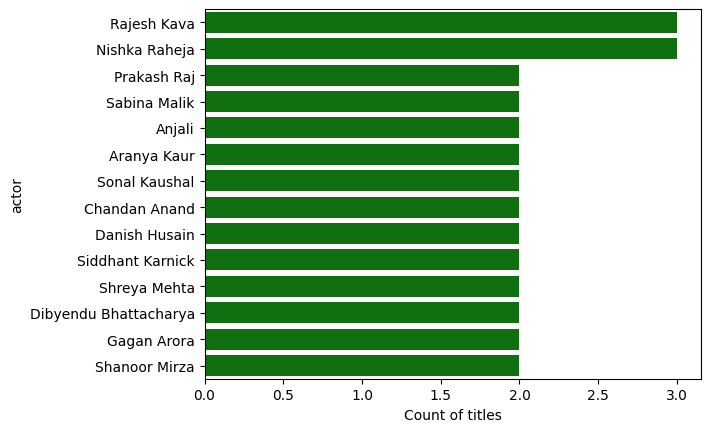

In [145]:
sns.barplot(data= india_show_actor, x= 'title', y= 'actor', color= 'green')
plt.xlabel('Count of titles')
plt.show()

Rajesh Kava and Nishka Raheja are most popular actors across TV shows in India.

In [146]:
india_rating_data= india_movie.groupby('rating').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
india_rating_data.head()

rating  title
4  TV-14    573
6  TV-MA    241
7  TV-PG    137
9  TV-Y7     53
2  PG-13     11

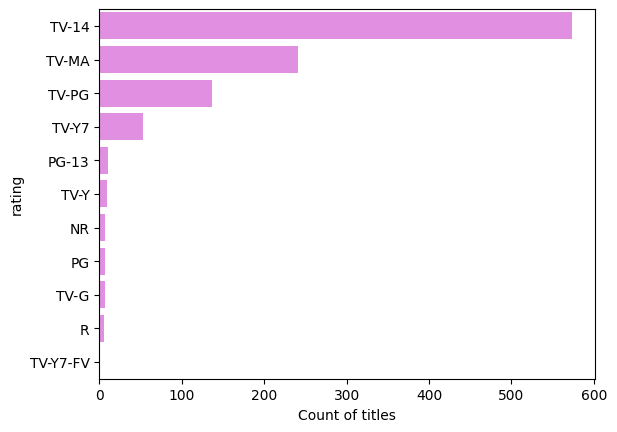

In [147]:
sns.barplot(data= india_rating_data, x= 'title', y= 'rating', color= 'violet')
plt.xlabel('Count of titles')
plt.show()

In [148]:
india_rating_show= india_shows.groupby('rating').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
india_rating_show.head()

rating  title
2  TV-MA     35
0  TV-14     25
3  TV-PG     11
4   TV-Y      6
5  TV-Y7      6

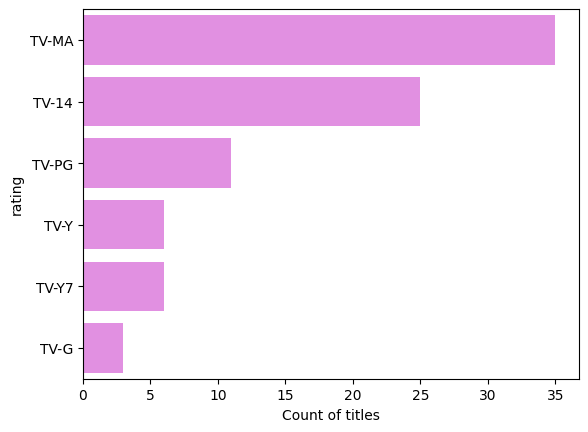

In [149]:
sns.barplot(data= india_rating_show, x= 'title', y= 'rating', color= 'violet')
plt.xlabel('Count of titles')
plt.show()

Plots suggests that overall content across Netflix is meant for Mature audience and for above 14 in India.

In [150]:
india_duration_movie= india_movie.groupby('duration').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
india_duration_movie.head()

duration  title
2  120-150    437
1  100-120    253
3  150-200    160
6   80-100    115
5    50-80     74

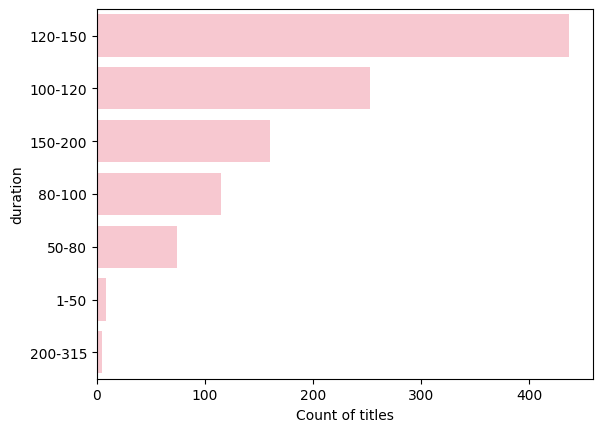

In [151]:
sns.barplot(data= india_duration_movie, x= 'title', y= 'duration', color= 'pink')
plt.xlabel('Count of titles')
plt.show()

100-150 is the best duration range to make movies in India.

In [152]:
india_duration_show= india_shows.groupby('duration').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
india_duration_show.head()

duration  title
0   1 Season     75
1  2 Seasons      6
2  3 Seasons      4
3  4 Seasons      1

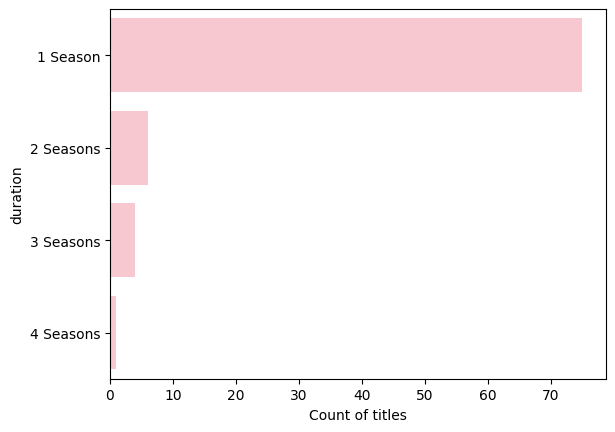

In [153]:
sns.barplot(data= india_duration_show, x= 'title', y= 'duration', color= 'pink')
plt.xlabel('Count of titles')
plt.show()

TV shows having one season are more popular as compared to shows more seasons.

In [154]:
india_release_movie= india_movie.groupby('release_year').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
india_release_movie= india_release_movie[india_release_movie['release_year']>= 2000]
india_release_movie.head()

release_year  title
52          2017    117
53          2018    103
54          2019     93
51          2016     80
55          2020     66

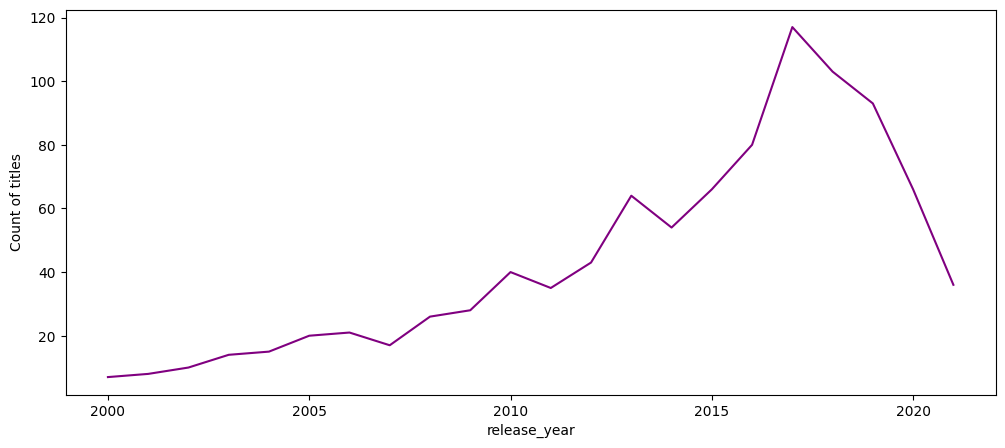

In [155]:
plt.figure(figsize= (12, 5))
sns.lineplot(data= india_release_movie, y= 'title', x= 'release_year', color= 'purple')
plt.ylabel('Count of titles')
plt.show()

Movies releasing every year have increased over the years but after 2017 we can see a sudden dip in releasing of movies.

In [156]:
india_release_show= india_shows.groupby('release_year').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
india_release_show= india_release_show[india_release_show['release_year']>= 2000]
india_release_show.head()

release_year  title
11          2020     17
10          2019     15
9           2018     13
12          2021     11
6           2015     10

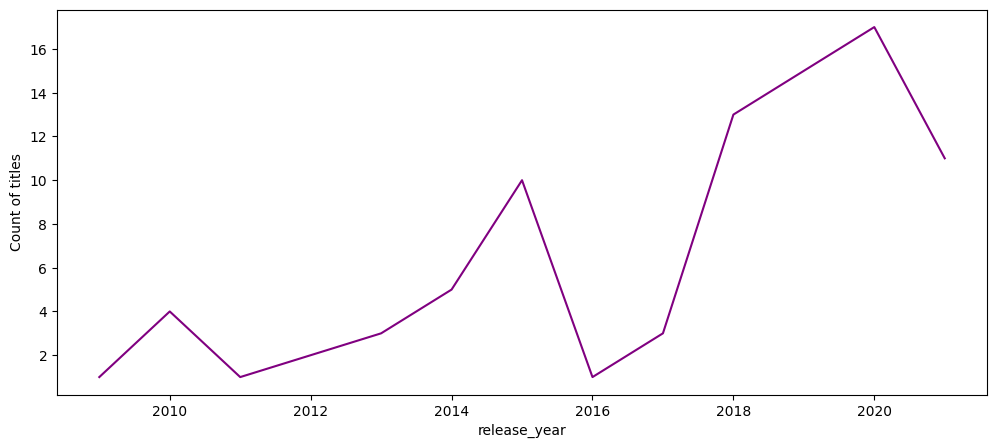

In [157]:
plt.figure(figsize= (12, 5))
sns.lineplot(data= india_release_show, y= 'title', x= 'release_year', color= 'purple')
plt.ylabel('Count of titles')
plt.show()

Releasing of TV shows decreased after 2015 but peaked in 2020 before declining again

In [158]:
india_movie_year= india_movie.groupby('listed_year').agg({'title': 'nunique'}).reset_index()
india_movie_year.head()

listed_year  title
0       2016.0     13
1       2017.0    157
2       2018.0    336
3       2019.0    221
4       2020.0    186

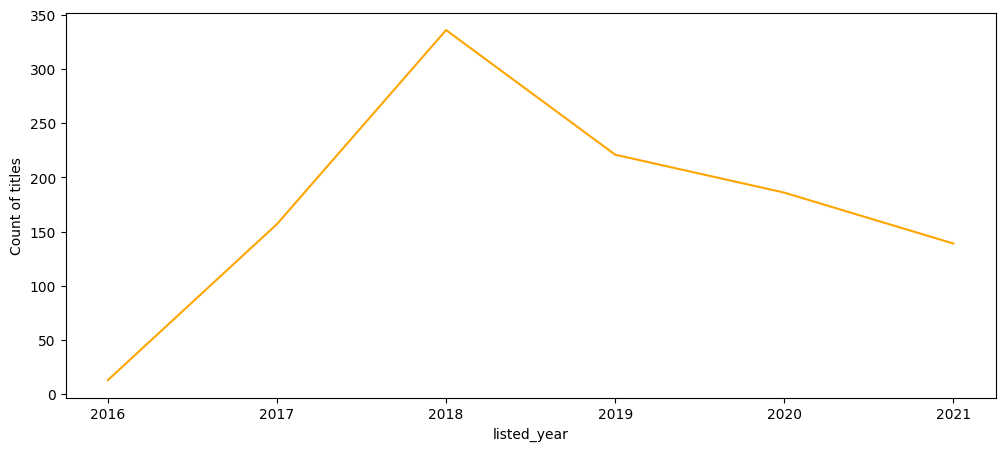

In [159]:
plt.figure(figsize= (12, 5))
sns.lineplot(data= india_movie_year, x= 'listed_year', y= 'title', color= 'orange')
plt.ylabel('Count of titles')
plt.show()

In [160]:
india_show_year= india_shows.groupby('listed_year').agg({'title': 'nunique'}).reset_index()
india_show_year

listed_year  title
0       2017.0     13
1       2018.0     17
2       2019.0     18
3       2020.0     19
4       2021.0     18

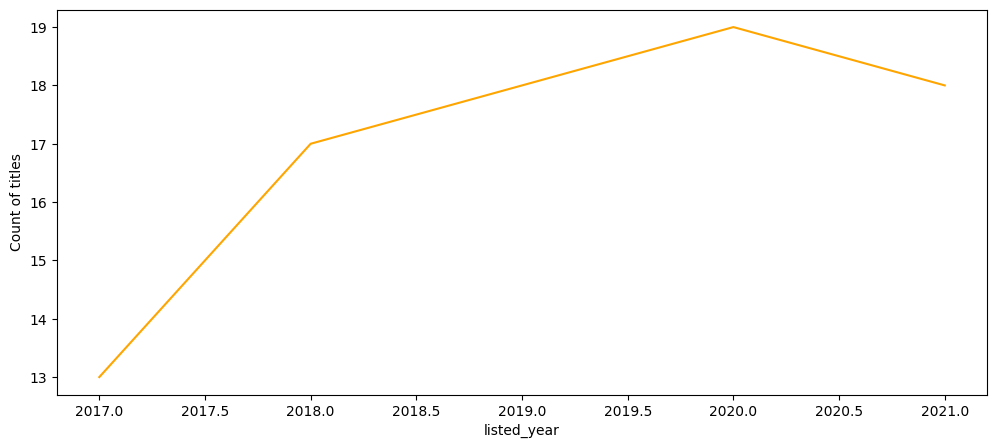

In [161]:
plt.figure(figsize= (12, 5))
sns.lineplot(data= india_show_year, x= 'listed_year', y= 'title', color= 'orange')
plt.ylabel('Count of titles')
plt.show()

Listing of movies and TV shows on Netflix in India saw a downward trend, with movies declining after 2018 and TV shows declining after 2020.

In [162]:
india_movie_month= india_movie.groupby('month').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
india_movie_month

month  title
2    December    116
0       April    113
10    October    109
1      August    105
7       March    100
5        July     97
9    November     93
11  September     80
4     January     70
8         May     67
3    February     55
6        June     47

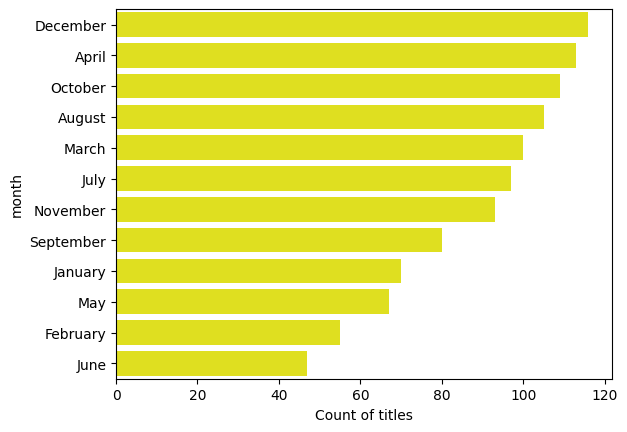

In [163]:
sns.barplot(data= india_movie_month, y= 'month', x= 'title', color= 'yellow')
plt.xlabel('Count of titles')
plt.show()

Best months to list Movies on Netflix in India are December and April.

In [164]:
india_show_month= india_shows.groupby('month').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
india_show_month

month  title
0       April     17
7       March     14
8         May      9
2    December      7
6        June      7
10    October      7
1      August      6
11  September      6
3    February      4
5        July      3
9    November      3
4     January      2

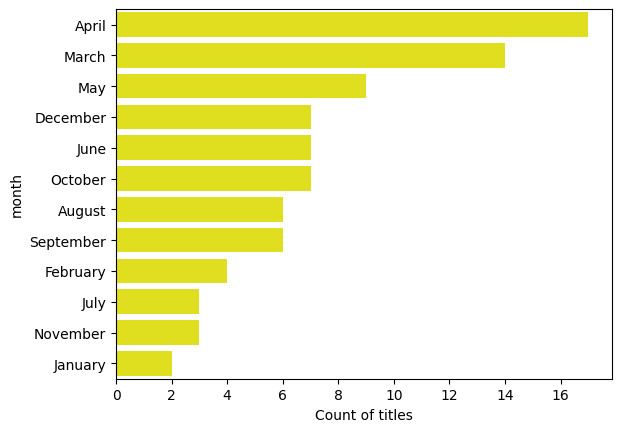

In [165]:
sns.barplot(data= india_show_month, y= 'month', x= 'title', color= 'yellow')
plt.xlabel('Count of titles')
plt.show()

Best time to list TV show on Netflix across India is First quarter of the year.

In [166]:
# Now we will analyse the best actors and directors combination across Movies and TV Shows in India.
india_movie['actor_director_combination']= india_movie['actor'].str.cat(india_movie['directors'], sep= ' and ')
india_movie= india_movie[~india_movie['actor_director_combination'].str.contains('Unknown')]

<ipython-input-166-05ca37521c21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_movie['actor_director_combination']= india_movie['actor'].str.cat(india_movie['directors'], sep= ' and ')


In [167]:
india_movie_combination= india_movie.groupby('actor_director_combination').agg({'title':'nunique'}).reset_index().sort_values('title', ascending= False)[:20]
india_movie_combination.head()

actor_director_combination  title
2652   Julie Tejwani and Rajiv Chilaka     19
4947     Rajesh Kava and Rajiv Chilaka     19
2508  Jigna Bhardwaj and Rajiv Chilaka     18
5438    Rupa Bhimani and Rajiv Chilaka     18
7195    Vatsal Dubey and Rajiv Chilaka     16

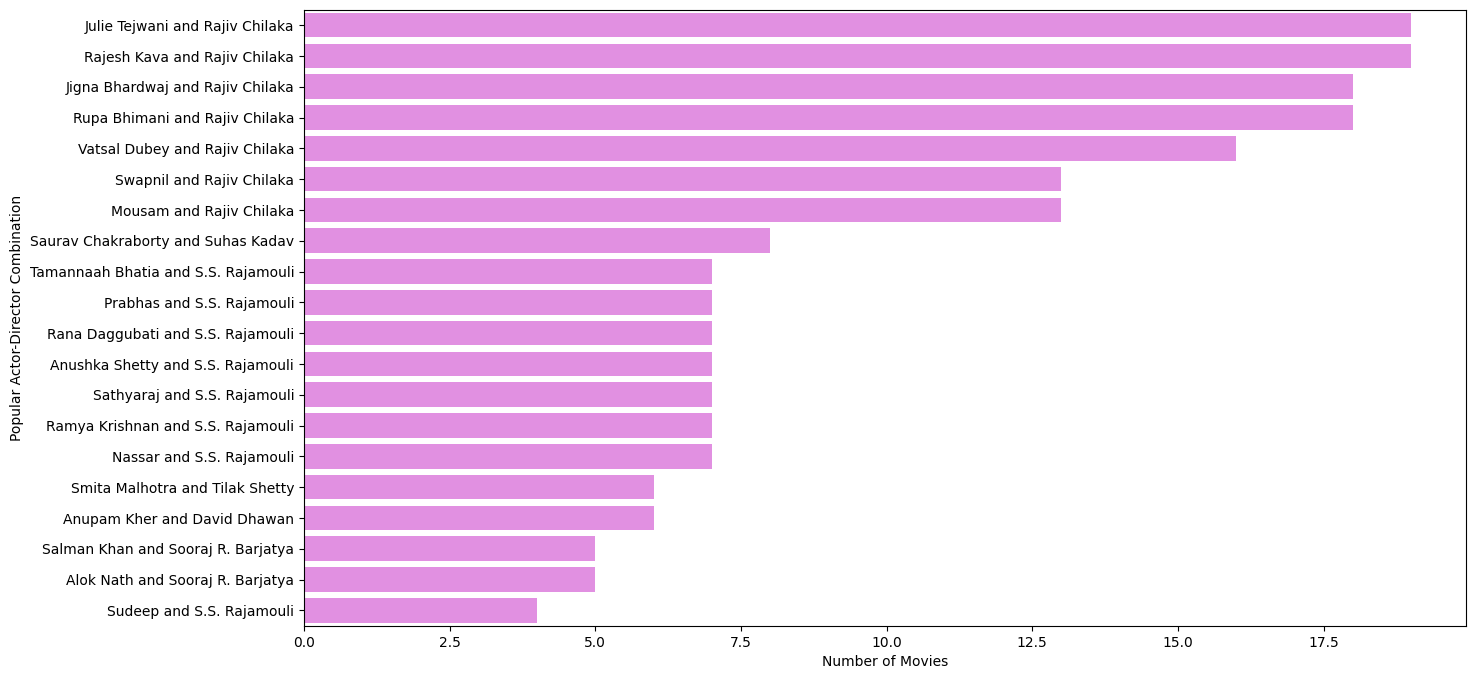

In [168]:
plt.figure(figsize= (15, 8))
sns.barplot(data= india_movie_combination, x= 'title', y= 'actor_director_combination', color= 'violet')
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

**Most popular Actor-Director combination across Movies in the India are :-**

'Julie Tejwani - Rajiv Chilaka'

'Rajesh Kava - Rajiv Chilaka'

'Jigna Bhardwaj - Rajiv Chilaka'

'Rupa Bhimani - Rajiv Chilaka'

'Vatsal Dubey - Rajiv Chilaka'

'Swapnil - Rajiv Chilaka'

'Mousam - Rajiv Chilaka'

'Saurav Chakraborty - Suhas Kadav'

'Ramya Krishnan - S.S. Rajamouli'

'Nassar - S.S. Rajamouli'

In [169]:
india_shows['actor_director_combination']= india_shows['actor'].str.cat(india_shows['directors'], sep= ' and ')
india_shows= india_shows[~india_shows['actor_director_combination'].str.contains('Unknown')]

<ipython-input-169-29c9423b4ddd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_shows['actor_director_combination']= india_shows['actor'].str.cat(india_shows['directors'], sep= ' and ')


In [170]:
india_show_combination= india_shows.groupby('actor_director_combination').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[:20]
india_show_combination.head()

actor_director_combination  title
123  Gautham Vasudev Menon and Gautham Vasudev Menon      2
32                  Anjali and Gautham Vasudev Menon      2
232            Prakash Raj and Gautham Vasudev Menon      2
0                         Aditi Arya and Nizar Shafi      1
262                  Radhika Apte and Anurag Kashyap      1

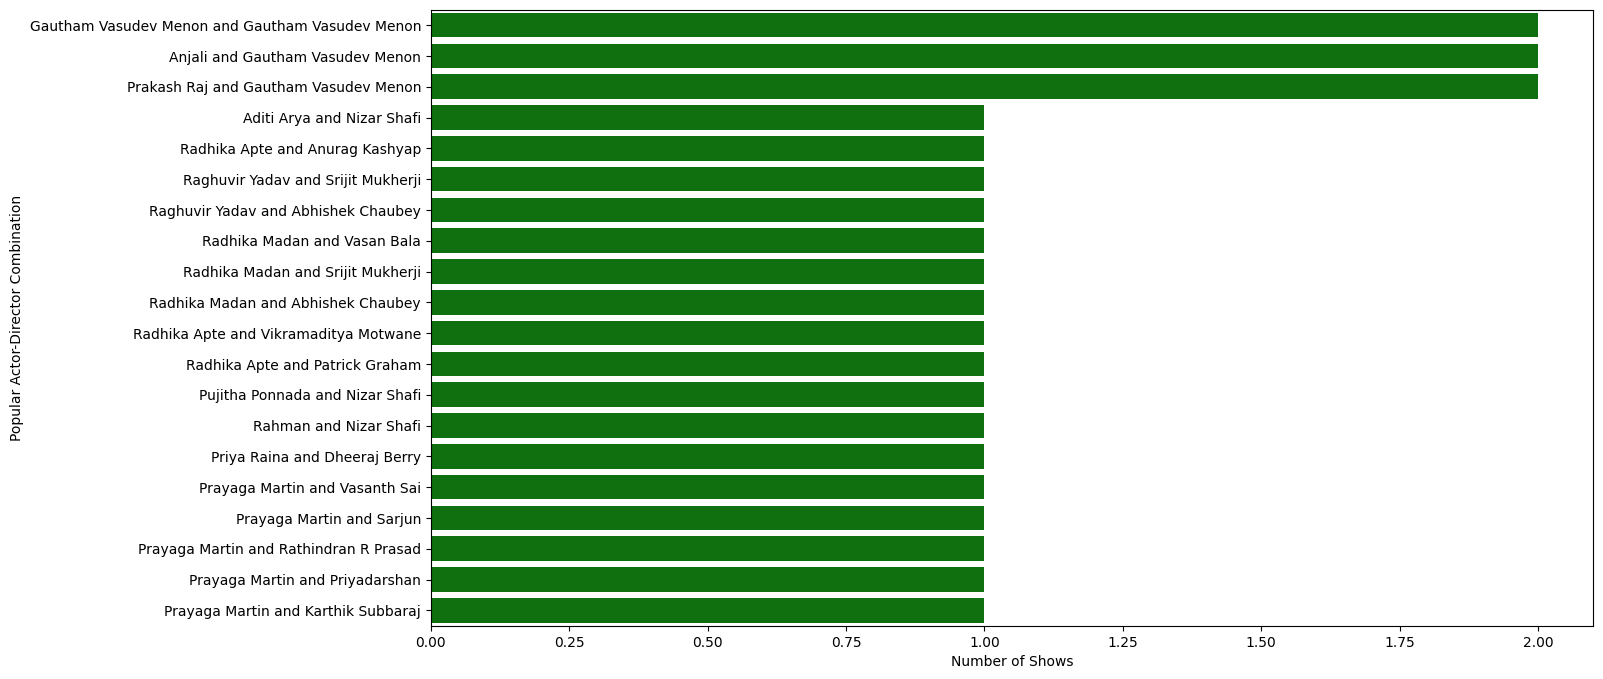

In [171]:
plt.figure(figsize= (15, 8))
sns.barplot(data= india_show_combination, x= 'title', y= 'actor_director_combination', color= 'green')
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

**Most popular Actor-Director combination across Movies in the India are :-**

'Gautham Vasudev Menon - Gautham Vasudev Menon',

'Anjali - Gautham Vasudev Menon'

'Prakash Raj - Gautham Vasudev Menon'

'Aditi Arya - Nizar Shafi'

'Radhika Apte - Anurag Kashyap',

'Raghuvir Yadav - Srijit Mukherji',

'Raghuvir Yadav - Abhishek Chaubey'

'Radhika Madan - Vasan Bala'

'Radhika Madan - Srijit Mukherji'

'Radhika Madan - Abhishek Chaubey'

We will analyse only for shows in Japan and South Korea as TV shows are more popular as compared to movies in Japan and south Korea

# Japan

In [172]:
japan_show= data[(data['country']== 'Japan') & (data['type']== 'TV Show')]

In [173]:
japan_data= data[data['country']== 'Japan']
japan_type= japan_data.groupby('type').agg({'title': 'nunique'}).reset_index()

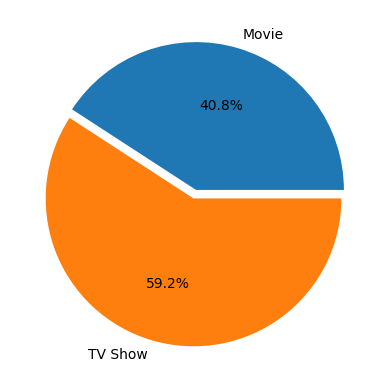

In [174]:
plt.pie(japan_type['title'], labels= india_type['type'],  explode= (0.03, 0.03), autopct='%.1f%%')
plt.show()

TV shows are more popular in Japan as compared to Movies.

In [175]:
japan_genre= japan_show.groupby('genre').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[:10]
japan_genre.head()

genre  title
4   International TV Shows    151
0             Anime Series    143
5                 Kids' TV     29
7        Romantic TV Shows     21
11               TV Dramas     21

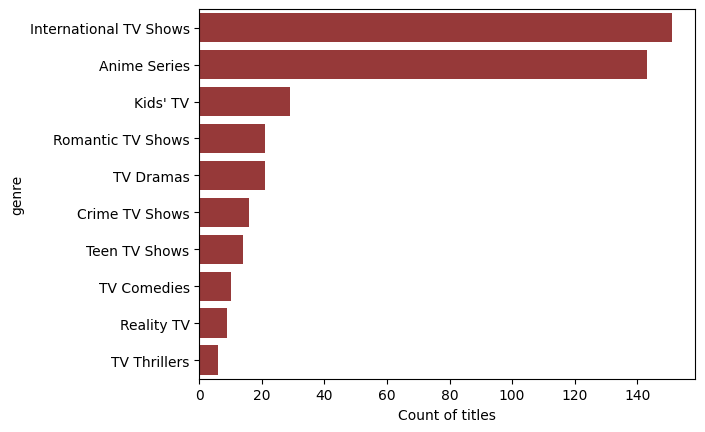

In [176]:
sns.barplot(data= japan_genre, x= 'title', y= 'genre', color= 'brown')
plt.xlabel('Count of titles')
plt.show()

International TV Shows and Anime series are the two most popular TV Shows categories in Japan.

In [177]:
japan_director= japan_show.groupby('directors').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[1:11]
japan_director= japan_director[japan_director['directors']!= 'Unknown']
japan_director.head()

directors  title
0         Caroline Sá      1
11      Kobun Shizuno      1
18  Tsutomu Mizushima      1
17      Thomas Astruc      1
16     Tensai Okamura      1

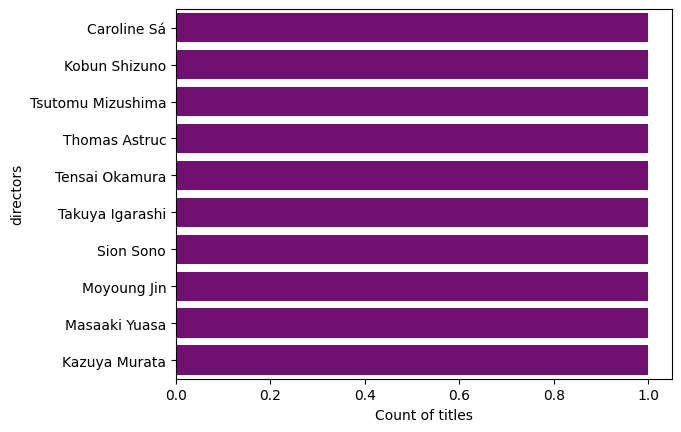

In [178]:
sns.barplot(data= japan_director, x= 'title', y= 'directors', color= 'purple')
plt.xlabel('Count of titles')
plt.show()

All the directors are one time directors only.

In [179]:
japan_actor= japan_show.groupby('actor').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[:15]
japan_actor= japan_actor[japan_actor['actor']!= 'Unknown']
japan_actor.head()

actor  title
987   Takahiro Sakurai     22
1172         Yuki Kaji     18
171        Daisuke Ono     17
363     Junichi Suwabe     16
5            Ai Kayano     16

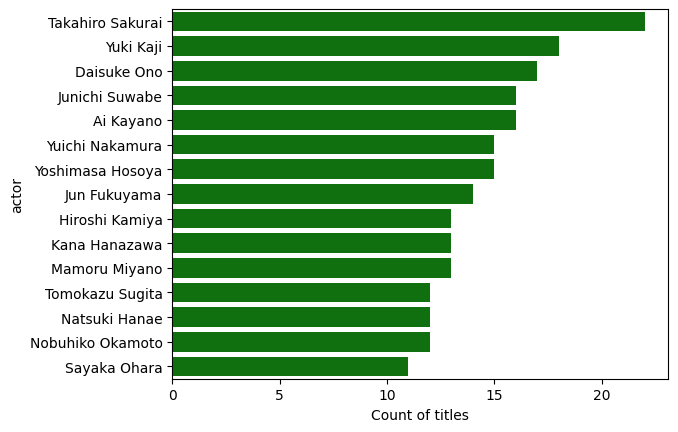

In [180]:
sns.barplot(data= japan_actor, x= 'title', y= 'actor', color= 'green')
plt.xlabel('Count of titles')
plt.show()

**Most popular Actors across Netflix in Japan are :-**

'Takahiro Sakurai'

'Yuki Kaji'

'Daisuke Ono'

'Ai Kayano'

'Junichi Suwabe'

'Yuichi Nakamura'

'Yoshimasa Hosoya'

'Jun Fukuyama'

In [181]:
japan_rating= japan_show.groupby('rating').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
japan_rating.head()

rating  title
1  TV-14     77
3  TV-MA     69
6  TV-Y7     27
4  TV-PG     22
2   TV-G      2

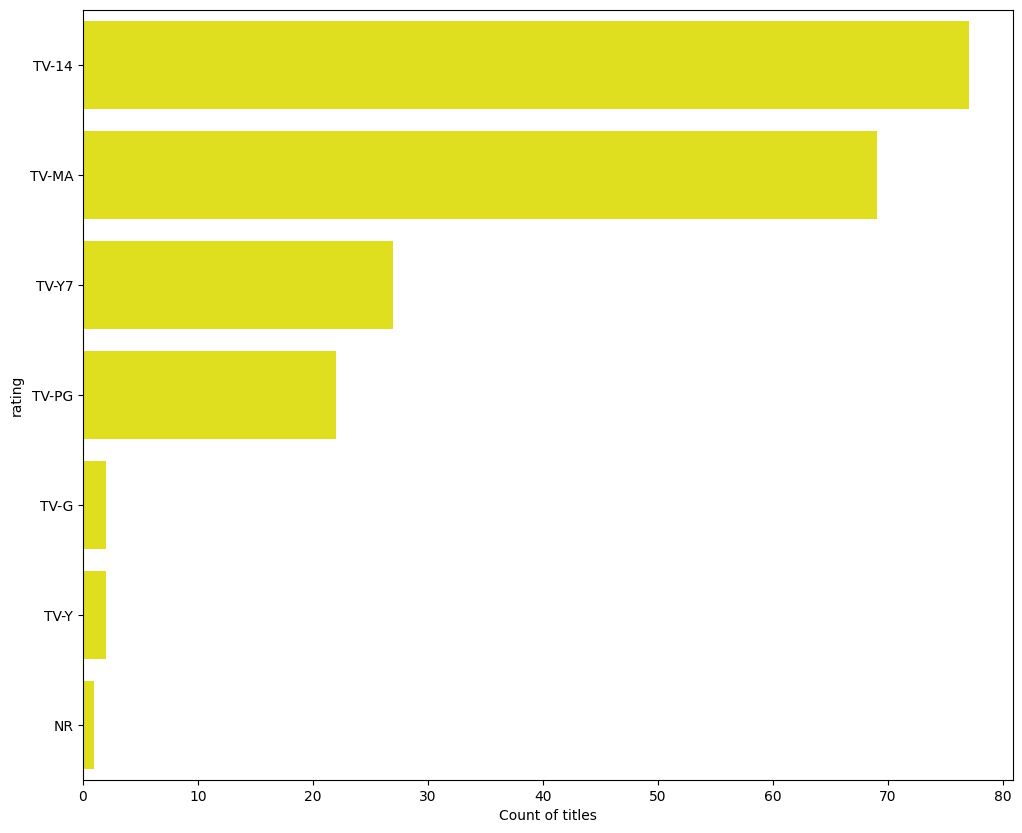

In [182]:
plt.figure(figsize= (12, 10))
sns.barplot(data= japan_rating, x= 'title', y= 'rating', color= 'yellow')
plt.xlabel('Count of titles')
plt.show()

TV shows in Japan are made for matured people and for age above 14.

In [183]:
japan_release= japan_show.groupby('release_year').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
japan_release= japan_release[japan_release['release_year']>= 2000]
japan_release.head()

release_year  title
25          2018     33
26          2019     24
24          2017     21
27          2020     15
28          2021     13

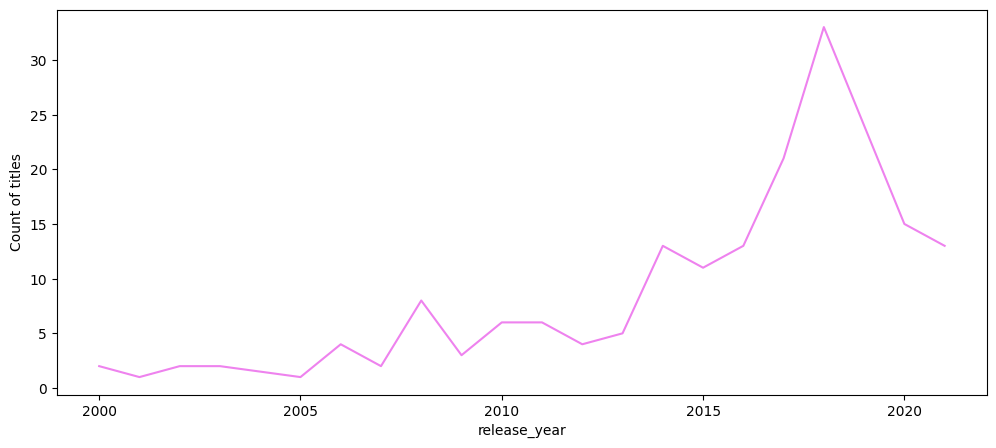

In [184]:
plt.figure(figsize= (12, 5))
sns.lineplot(data= japan_release, y= 'title', x= 'release_year', color= 'violet')
plt.ylabel('Count of titles')
plt.show()

Number of released shows have increased every year till 2018, but after it decreased could be due to Covid-19.

In [185]:
japan_listed_year= japan_show.groupby('listed_year').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
japan_listed_year.head()

listed_year  title
5       2020.0     47
4       2019.0     45
3       2018.0     30
6       2021.0     30
1       2016.0     24

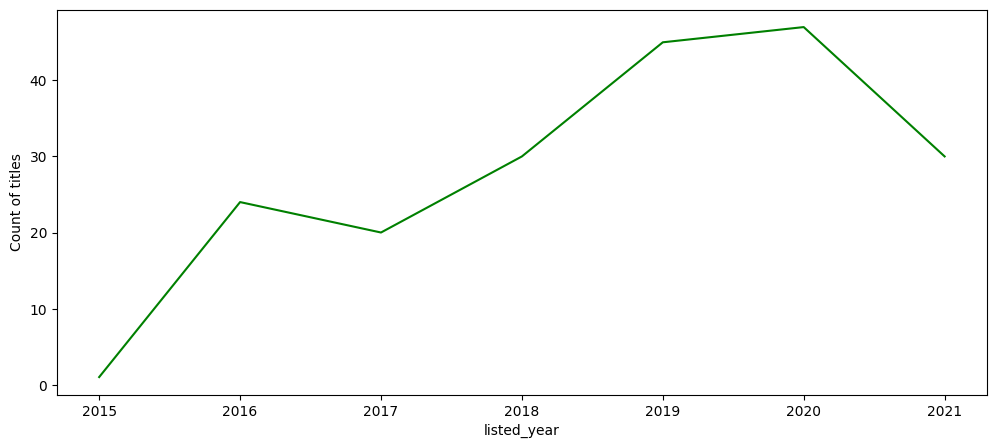

In [186]:
plt.figure(figsize= (12, 5))
sns.lineplot(data= japan_listed_year, y= 'title', x= 'listed_year', color= 'green')
plt.ylabel('Count of titles')
plt.show()

After 2020, we can see reduction in number of shows listing in Netflix.

In [187]:
japan_month= japan_show.groupby('month').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
japan_month.head()

month  title
6      June     24
2  December     23
4   January     20
0     April     18
5      July     18

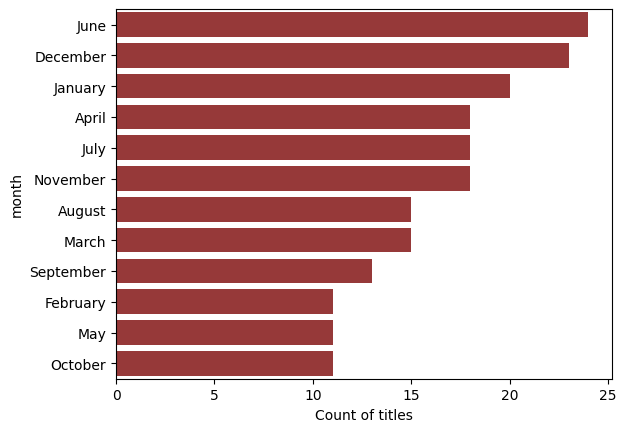

In [188]:
sns.barplot(data= japan_month, x= 'title', y= 'month', color= 'brown')
plt.xlabel('Count of titles')
plt.show()

December and June are the best months to list TV shows in Japan on Netflix.

# South Korea

In [189]:
korea_show= data[(data['country']== 'South Korea') & (data['type']== 'TV Show')]

In [190]:
korea_data= data[data['country']== 'South Korea']
korea_data= korea_data.groupby('type').agg({'title': 'nunique'}).reset_index()

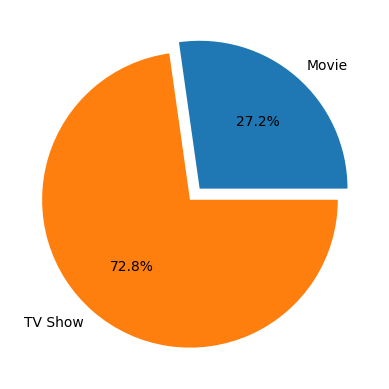

In [191]:
plt.pie(korea_data['title'], labels= india_type['type'],  explode= (0.05, 0.05), autopct='%.1f%%')
plt.show()

Like Japan, TV shows are more popular than Movies in South Korea.

In [192]:
korea_genre= korea_show.groupby('genre').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
korea_genre.head()

genre  title
1  International TV Shows    153
3         Korean TV Shows    132
5       Romantic TV Shows     78
9               TV Dramas     38
0          Crime TV Shows     24

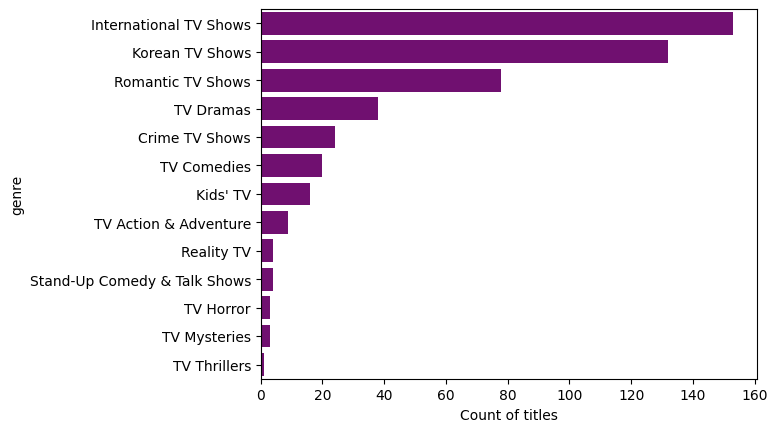

In [193]:
sns.barplot(data= korea_genre, x= 'title', y= 'genre', color= 'purple')
plt.xlabel('Count of titles')
plt.show()

International TV shows and Romantic TV shows are pretty popular in North Korea.

In [211]:
korea_director= korea_show.groupby('directors').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[:10]
korea_direcor= korea_director[korea_director['directors']!= 'Unknown']
korea_director.head()

directors  title
4      Jung-ah Im      2
12    Shin Won-ho      2
0        Cai Cong      1
1   Chang-Min Lee      1
2     Hong Won-ki      1

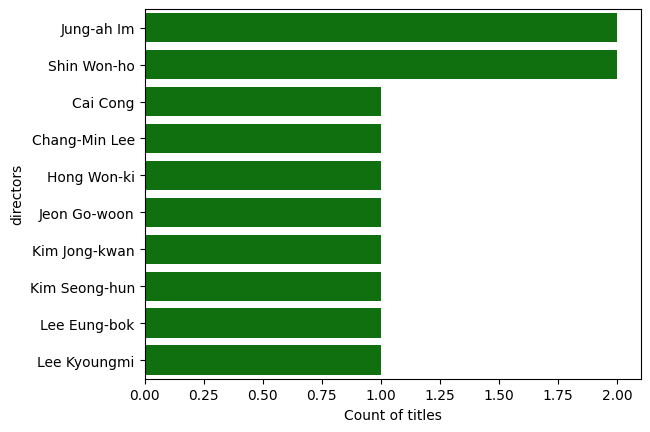

In [212]:
sns.barplot(data= korea_director, x= 'title', y= 'directors', color= 'green')
plt.xlabel('Count of titles')
plt.show()

Only two directors(Jung-ah Im and Shin Won-ho) have directed more than one TV show. Rest are one time director only.

In [196]:
korea_actor= korea_show.groupby('actor').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[:10]
korea_actor= korea_actor[korea_actor['actor']!= 'Unknown']
korea_actor.head()

actor  title
940   Sung Dong-il      5
527    Kim Won-hae      5
87    Cho Seong-ha      5
723   Nam Joo-hyuk      4
82   Cho Han-cheul      4

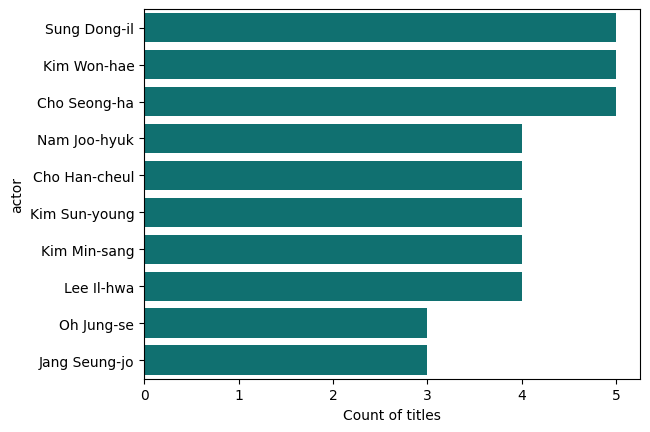

In [197]:
sns.barplot(data= korea_actor, x= 'title', y= 'actor', color= 'teal')
plt.xlabel('Count of titles')
plt.show()

**Most popular Korean TV shows actors are :-**

'Sung Dong-il'

'Kim Won-hae'

'Cho Seong-ha'

'Nam Joo-hyuk',

'Cho Han-cheul'

In [198]:
korea_rating= korea_show.groupby('rating').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
korea_rating

rating  title
0  TV-14     83
2  TV-MA     55
3  TV-PG     15
5  TV-Y7      9
4   TV-Y      8
1   TV-G      1

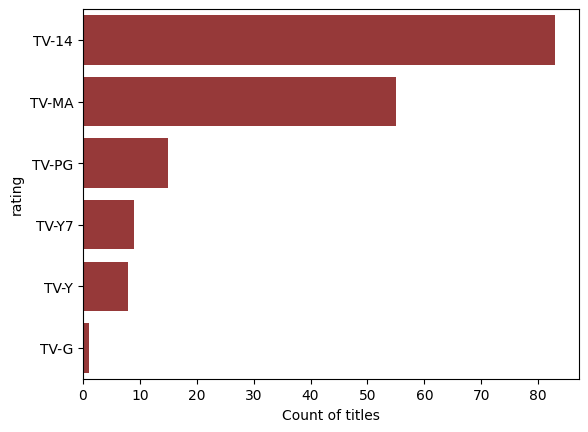

In [199]:
sns.barplot(data= korea_rating, x= 'title', y= 'rating', color= 'brown')
plt.xlabel('Count of titles')
plt.show()

Korean TV shows are made for people above 14 or those who are matured.

In [200]:
korea_duration= korea_show.groupby('duration').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
korea_duration

duration  title
0   1 Season    143
1  2 Seasons     18
2  3 Seasons      8
3  5 Seasons      1
4  6 Seasons      1

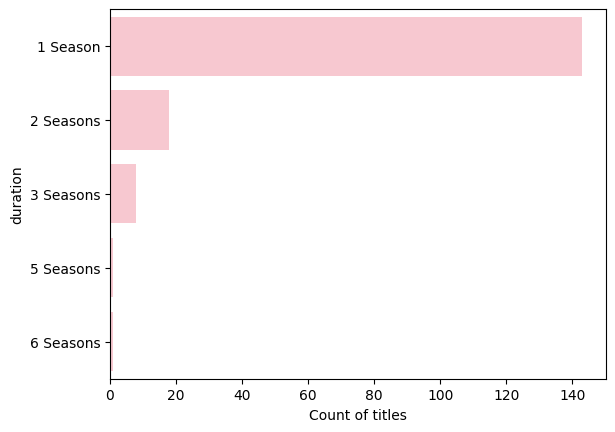

In [201]:
sns.barplot(data= korea_duration, x= 'title', y= 'duration', color= 'pink')
plt.xlabel('Count of titles')
plt.show()

Korean TV Shows having one season are more popular as compared to shows having more seasons.

In [202]:
korea_release_year = korea_show.groupby('release_year').agg({'title': 'nunique'}).reset_index()
korea_release_year= korea_release_year[korea_release_year['release_year']>= 2000]
korea_release_year

release_year  title
0           2009      3
1           2010      2
2           2011      1
3           2012     10
4           2013      5
5           2014      7
6           2015     11
7           2016     28
8           2017     23
9           2018     20
10          2019     20
11          2020     26
12          2021     15

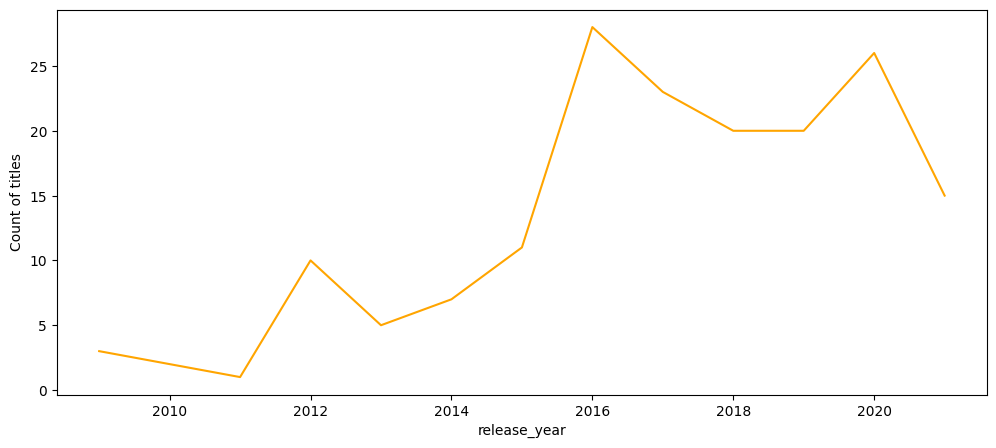

In [203]:
plt.figure(figsize= (12, 5))
sns.lineplot(data= korea_release_year, y= 'title', x= 'release_year', color= 'orange')
plt.ylabel('Count of titles')
plt.show()

The number of TV Shows in South Korea reached peak in 2016. It then reached
a second peak in 2019. It has reduced in 2021 from 2020.

In [204]:
korea_listed_year= korea_show.groupby('listed_year').agg({'title': 'nunique'}).reset_index()
korea_listed_year

listed_year  title
0       2016.0     10
1       2017.0     28
2       2018.0     17
3       2019.0     45
4       2020.0     44
5       2021.0     22

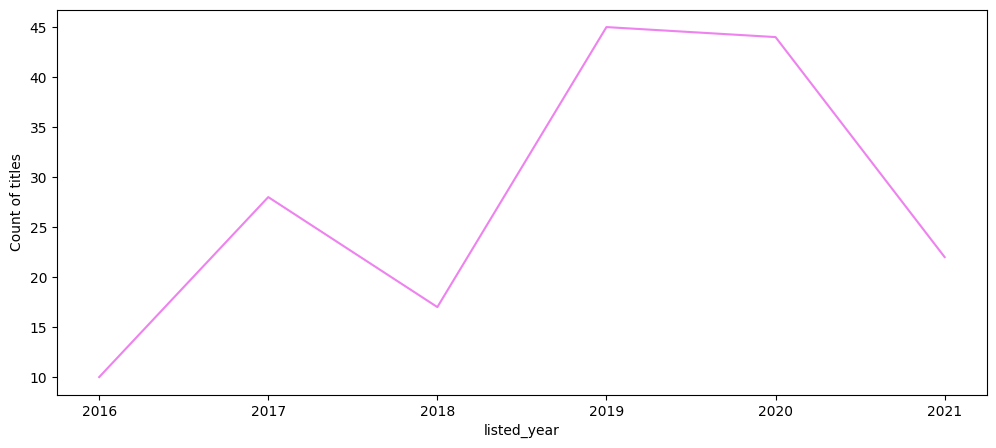

In [205]:
plt.figure(figsize= (12, 5))
sns.lineplot(data= korea_listed_year, y= 'title', x= 'listed_year', color= 'violet')
plt.ylabel('Count of titles')
plt.show()

In South Korea, number of TV Shows reduced in 2018 from 2017, then increased till 2019 but have been on a heavy downfall since then.

In [206]:
korea_month= korea_show.groupby('month').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)
korea_month

month  title
2    December     23
8         May     18
3    February     16
10    October     16
6        June     15
0       April     13
1      August     12
5        July     12
7       March     12
9    November     12
11  September      9
4     January      8

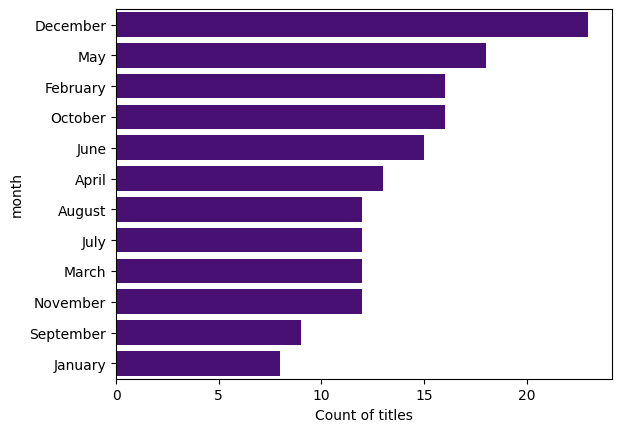

In [207]:
sns.barplot(data= korea_month, x= 'title', y= 'month', color= 'indigo')
plt.xlabel('Count of titles')
plt.show()

Best time to list a TV show in korea is December and May.

In [208]:
korea_show['actor_director_combination']= korea_show['actor'].str.cat(korea_show['directors'], sep= ' and ')
korea_show= korea_show[~korea_show['actor_director_combination'].str.contains('Unknown')]

<ipython-input-208-f0823a72c7d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korea_show['actor_director_combination']= korea_show['actor'].str.cat(korea_show['directors'], sep= ' and ')


In [209]:
korea_show_combination= korea_show.groupby('actor_director_combination').agg({'title': 'nunique'}).reset_index().sort_values('title', ascending= False)[:15]
korea_show_combination.head()

actor_director_combination  title
69       Lee Il-hwa and Shin Won-ho      2
117    Sung Dong-il and Shin Won-ho      2
0    Ahn Kil-kang and Lee Yoon-jung      1
79    Lee Sung-wook and Yim Pilsung      1
91   Park Hae-Jin and Lee Yoon-jung      1

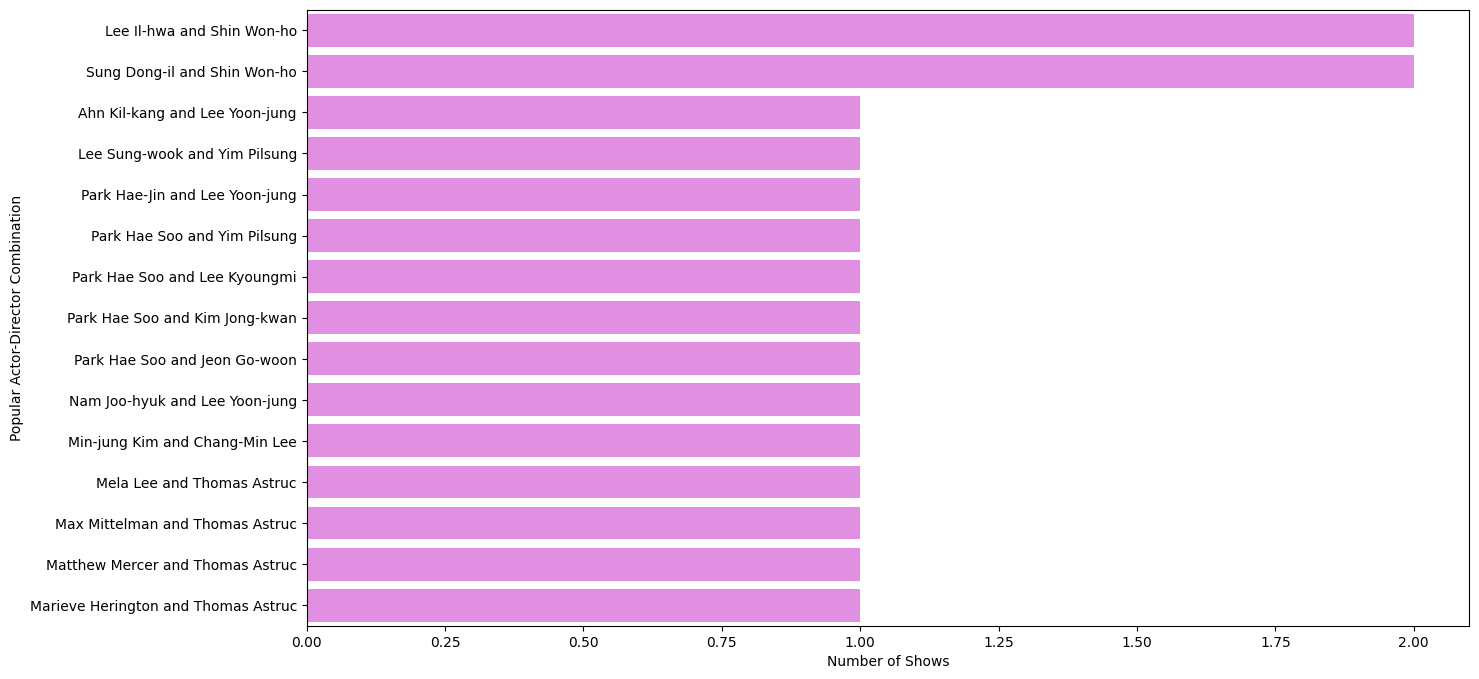

In [210]:
plt.figure(figsize= (15, 8))
sns.barplot(data= korea_show_combination, x= 'title', y= 'actor_director_combination', color= 'violet')
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

**The most popoular Actor-Director combinations across TV Shows in North Korea are :-**

'Lee Il-hwa - Shin Won-ho'

'Sung Dong-il - Shin Won-ho'

'Ahn Kil-kang - Lee Yoon-jung'

'Lee Sung-wook - Yim Pilsung'

'Park Hae-Jin - Lee Yoon-jung'

# Business Insights

*   Data is distributed in a 70 to 30 ratio between Movies and TV shows.

*   Movies with durations between 80 to 120 minutes are the most popular.

*   Popular TV shows typically have only 1 to 2 seasons.

*   The United States leads with the most overall content, followed by India.

*   Movies are more popular in the United States and India compared to TV  
    shows, whereas in Japan and South Korea, TV shows are more popular.

*   Drama and comedies are the most popular genres across Netflix.

*   The listing of TV shows and movies decreased after 2019 due to Covid-19.

*   Overall, content on Netflix is geared towards mature audiences.
    TV-MA (Mature Audience TV), TV-14 (for ages 14 and up) and TV-PG (Parental Guidance Suggested) are the most popular rating categories across the platform.



*   Rajiv Chilaka, Jan Sutar and Raul Compos are the three directors making the
    most number of Movies across Netflix. Alastair Fothergill and Stan Lathan are the two most popular TV Shows directors.

*   Indian actors like Anupam Kher, Shahrukh Khan, Nasserudin Shah and Akshay
    Kumar are most popular actors across Netflix.
    
*   Rajiv Chilaka's Chotta Bheem animated series is popular in India.


# Recommendations

*    Since movies are more popular in the United States and India, the focus
     should be on adding more movies to Netflix in these countries compared to TV shows.

*   Given that TV shows are more popular in Japan and South Korea, there should
    be a focus on adding more TV shows to Netflix in these countries.

*   It's recommended to maintain a healthy balance of TV shows and movies on
    Netflix.

*   Movies with durations between 90 to 120 minutes and TV shows with 1 to 2
    seasons should be prioritized, as they are the most popular formats.

*   Consider popular actor/director combinations when creating content for
    Netflix according to that country.

*   Content aligning with international TV shows/movies, comedies, and dramas,
    which are the most popular genres across all countries, is recommended.

*   For TV shows, prioritize the anime genre for Japan and the romantic genre
    for South Korea.

*   Ensure that overall content aligns with rating categories such as TV-MA
    (Matured Audience TV) and TV-14 (for ages 14 and up).

*   Add more movies tailored for the Indian audience, as there has been a
    decline since 2018.

*   Rajiv Chilaka's Chotta Bheem animated movies and series are popular, so
    Netflix can focus on creating more animated shows for kids in India.